## Assignment: Advanced Regression

In [359]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns

%matplotlib inline

In [360]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [361]:
# set the maximum display columns and rows
pd.set_option('display.max_columns', 111)
pd.set_option('display.max_rows', 50)

### Reading and Understanding the Data

In [362]:
# Importing dataset
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [363]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [365]:
df.shape

(1460, 81)

In [366]:
# Column which contains null data
round(100*(df.isnull().sum()/len(df.index)), 2)[round(df.isnull().sum()/len(df.index), 2).values > 0.00].sort_values(ascending=False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64

### Cleaning the Data

In [367]:
# Checking numeric column data
df.select_dtypes(include=['float64', 'int64']).describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [368]:
# Convert year column to number or calculate the age for the column YearBuilt, YearRemodAdd, GarageYrBlt, YrSold
df['AgeYearBuilt'] = df.YearBuilt.max() - df['YearBuilt']
df['AgeYearRemodAdd'] = df.YearRemodAdd.max() - df['YearRemodAdd']
df['AgeGarageYrBlt'] = df.GarageYrBlt.max() - df['GarageYrBlt']
df['AgeYrSold'] = df.YrSold.max() - df['YrSold']

# drop the original column as we will use above created column
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [369]:
df[['AgeYearBuilt', 'AgeYearRemodAdd', 'AgeGarageYrBlt', 'AgeYrSold']].head()

,AgeYearBuilt,AgeYearRemodAdd,AgeGarageYrBlt,AgeYrSold
0,7,7,7.0,2
1,34,34,34.0,3
2,9,8,9.0,2
3,95,40,12.0,4
4,10,10,10.0,2


#### Below are the column list which has 50 % of missing data so droping it.
- PoolQC           99.52
- MiscFeature      96.30
- Alley            93.77
- Fence            80.75
- FireplaceQu      47.26


In [370]:
# Droping the column which have 
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [371]:
# No use of 'Id' column so droping it
df.drop(['Id'], axis=1, inplace=True)

In [372]:
# List of column still have empty data
round(100*(df.isnull().sum()/len(df.index)), 2)[round(df.isnull().sum()/len(df.index), 2).values > 0.00].sort_values(ascending=False)

LotFrontage       17.74
AgeGarageYrBlt     5.55
GarageCond         5.55
GarageQual         5.55
GarageFinish       5.55
GarageType         5.55
BsmtFinType2       2.60
BsmtExposure       2.60
BsmtFinType1       2.53
BsmtCond           2.53
BsmtQual           2.53
MasVnrArea         0.55
MasVnrType         0.55
dtype: float64

In [373]:
# viewing data based on the interval percentage
df.describe(percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 1])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeYearBuilt,AgeYearRemodAdd,AgeGarageYrBlt,AgeYrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,31.493836,2.184247
std,42.300571,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,24.689725,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000,0.000000
5%,20.000000,34.000000,3311.700000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,88000.000000,3.000000,3.000000,3.000000,0.000000
10%,20.000000,44.000000,5000.000000,5.000000,5.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,106475.000000,4.000000,4.000000,4.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,8.000000,1.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,30.000000,2.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,49.000000,3.000000
90%,120.000000,96.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.0000

In [374]:
# As per the above details few columns have standard value which we can use as categorical instead of numerical
df['MoSold'] = df['MoSold'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['BsmtFullBath'] = df['BsmtFullBath'].astype('object')
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype('object')
df['FullBath'] = df['FullBath'].astype('object')
df['HalfBath'] = df['HalfBath'].astype('object')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('object')
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype('object')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')
df['GarageCars'] = df['GarageCars'].astype('object')

In [375]:
# Column which contains outliers 
out_col = [
    'LotArea',
    'TotalBsmtSF',
    'PoolArea',
    'MiscVal']

In [376]:
# Boxplot method to generate the graph to Check the outliers 

def draw_boxplot(cols):
    int_range = range(len(cols))[::3]
    col_length = len(cols)
    for col in int_range:
        print('----------------',cols[col:col+3],' ----------------')
        plt.figure(figsize=(17, 5))
        if col < col_length:  
            plt.subplot(1,3,1)
            sns.boxplot(x=cols[col], orient='v', data=df)
        if col+1 < col_length:                    
            plt.subplot(1,3,2)
            sns.boxplot(x=cols[col+1], orient='v', data=df)
        if col+2 < col_length:                
            plt.subplot(1,3,3)
            sns.boxplot(x=cols[col+2], orient='v', data=df)
                        
        plt.show()

---------------- ['LotArea', 'TotalBsmtSF', 'PoolArea']  ----------------


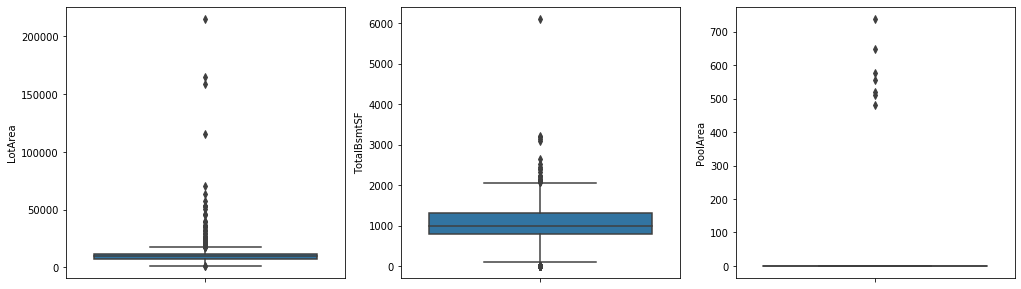

---------------- ['MiscVal']  ----------------


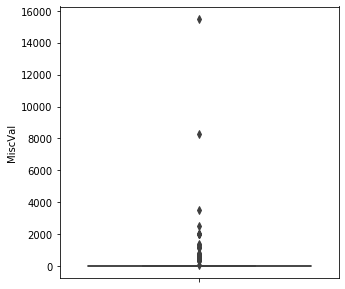

In [377]:
# Method call to draw boxplot for the outliers
draw_boxplot(out_col)

In [378]:
# Size before removing the outliers
df.shape

(1460, 75)

In [379]:
# method to remove outliers
def remove_outliers(x, num_cols, s_quntl=0.05, e_quntl=0.95):
    for col in num_cols:
        Q1 = x[col].quantile(s_quntl)
        Q3 = x[col].quantile(e_quntl)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

In [380]:
# call remove outliers method for the selected columns
df=remove_outliers(df, out_col)

In [381]:
# dataframe size after removing the outliers
df.shape

(1390, 75)

In [382]:
df.describe(percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeYearBuilt,AgeYearRemodAdd,AgeGarageYrBlt,AgeYrSold
count,1390.000000,1151.000000,1390.000000,1382.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.0,1390.0,1390.000000,1390.000000,1390.000000,1312.000000,1390.000000
mean,57.366906,69.527368,9730.140288,104.463097,433.645324,45.437410,574.561151,1053.643885,1157.182014,344.382734,5.485612,1507.050360,471.992086,90.913669,46.047482,21.367626,3.351079,14.466187,0.0,0.0,180456.894245,38.282734,24.878417,31.167683,2.196403
std,42.652453,23.064916,4254.591670,180.816155,430.367625,160.182307,446.351433,413.543582,372.241256,431.719420,47.620237,498.531003,212.923686,119.819434,63.968635,59.324534,28.811128,53.339627,0.0,0.0,77726.450836,30.339403,20.709073,24.746420,1.322503
min,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,34900.000000,0.000000,0.000000,0.000000,0.000000
5%,20.000000,34.000000,3196.000000,0.000000,0.000000,0.000000,0.000000,520.000000,672.450000,0.000000,0.000000,848.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,89484.050000,3.000000,3.000000,3.000000,0.000000
10%,20.000000,43.000000,4922.700000,0.000000,0.000000,0.000000,75.900000,636.900000,756.000000,0.000000,0.000000,912.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,107000.000000,4.000000,3.000000,4.000000,0.000000
25%,20.000000,59.000000,7500.000000,0.000000,0.000000,0.000000,227.500000,796.000000,880.500000,0.000000,0.000000,1131.000000,328.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,130000.000000,9.000000,6.000000,8.000000,1.000000
50%,50.000000,69.000000,9375.000000,0.000000,375.000000,0.000000,484.500000,991.500000,1082.000000,0.000000,0.000000,1465.000000,478.500000,0.000000,25.000000,0.000000,0.000000,0.000000,0.0,0.0,163000.000000,36.000000,16.000000,30.000000,2.000000
75%,70.000000,80.000000,11470.500000,167.750000,711.000000,0.000000,812.750000,1295.250000,1389.750000,728.000000,0.000000,1774.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.0,0.0,213875.000000,56.000000,43.000000,48.000000,3.000000
90%,120.000000,95.000000,14112.300000,334.800000,1059.000000,96.900000,1240.900000,1602.000000,1679.100000,939.100000,0.000000,2142.700000,757.100000,253.000000,130.000000,112.000000,0.000000,0.000000,0.0,0.0,278000.000000,85.100000,60.000000,65.000000,4.000000


In [383]:
# Method to replace the null value with the selected values
def filling_missing_values(col, replace_type:str, other_value=None):
    if replace_type == 'mean':
        df[col].fillna(df[col].mean(), inplace=True)  
    if replace_type == 'mode':
        df[col].fillna(df[col].mode()[0], inplace=True)
    if replace_type == 'median':
        df[col].fillna(df[col].median(), inplace=True)
    if replace_type == 'other':
        df[col].fillna(other_value, inplace=True)


In [384]:
# list of columns which contains null value
null_cols = df.columns[round(df.isnull().sum()/len(df.index), 2).values > 0.00]
null_cols

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'AgeGarageYrBlt'],
      dtype='object')

In [385]:
# column list which has null value
df[null_cols].describe(percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,LotFrontage,MasVnrArea,AgeGarageYrBlt
count,1151.000000,1382.000000,1312.000000
mean,69.527368,104.463097,31.167683
std,23.064916,180.816155,24.746420
min,21.000000,0.000000,0.000000
5%,34.000000,0.000000,3.000000
10%,43.000000,0.000000,4.000000
25%,59.000000,0.000000,8.000000
50%,69.000000,0.000000,30.000000
75%,80.000000,167.750000,48.000000
90%,95.000000,334.800000,65.000000


In [386]:
# Categorical value updating using mode values
for col in null_cols:
    if col not in ['LotFrontage', 'AgeGarageYrBlt', 'MasVnrArea']:
        filling_missing_values(col, 'mode')

# updating with mean value for the variable MasVnrArea   
filling_missing_values('LotFrontage', 'mean') 
filling_missing_values('MasVnrArea', 'mean') 
filling_missing_values('AgeGarageYrBlt', 'other', other_value=0)


In [387]:
# Check the column which still have null values
round(100*(df.isnull().sum()/len(df.index)), 2)[round(df.isnull().sum()/len(df.index), 2).values > 0.00].sort_values(ascending=False)

Series([], dtype: float64)

In [388]:
num_cols=df.select_dtypes(include=['int64', 'float']).columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'AgeYearBuilt', 'AgeYearRemodAdd', 'AgeGarageYrBlt',
       'AgeYrSold'],
      dtype='object')

In [389]:
# Method to fetch column list which contains more than 90% duplicate value
def percentage_of_duplicate(num_cols):
    x=list()
    for col in (num_cols):
        if(df[col].value_counts().max()/df.shape[0] >= 0.90):
            x.append(col)
    return x

In [390]:
# drop filtered column
filter_cols=percentage_of_duplicate(num_cols)
print(filter_cols)
df.drop(filter_cols, axis = 1, inplace = True)

['LowQualFinSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


### Visualising the Data

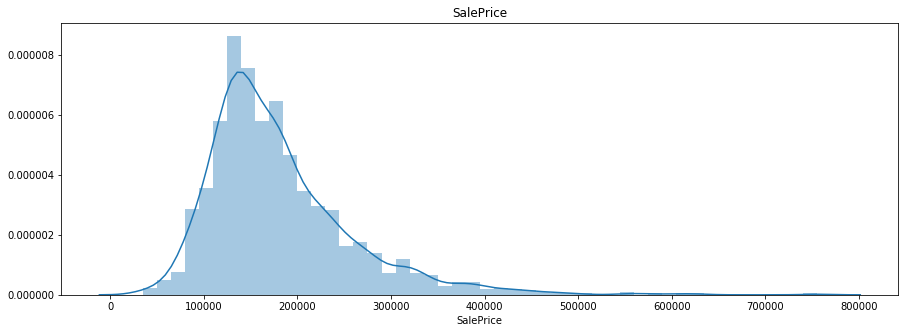

In [391]:
# target variable SalePrice
plt.figure(figsize=(15,5))
plt.title('SalePrice')
sns.distplot(df.SalePrice)
plt.show()

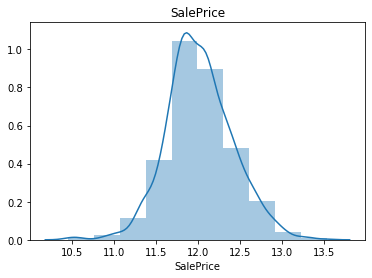

In [392]:
plt.title('SalePrice')
sns.distplot(np.log1p(df['SalePrice']), bins=10)
plt.show()

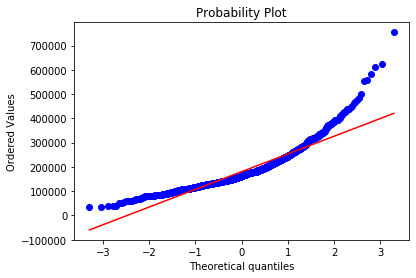

In [393]:
from scipy import stats
stats.probplot(df['SalePrice'], plot=plt)
plt.show()

In [394]:
# Method to viewing all the categorical variable
def categorical_data(cols):
    for col in cols:
        print('\n')
        print('---------------------------------------------- ',col,' -----------------------------------------------')
        print(df[col].astype('category').value_counts())
        f, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12,3), dpi=90) 
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=ax1) 
        ax1.set_ylabel('Count') 
        ax1.set_title(f'{col}', weight="bold") 
        ax1.set_xlabel(col) 
        if col == 'Neighborhood':
            xticks(rotation = 90)
        plt.show()




----------------------------------------------  MSZoning  -----------------------------------------------
RL         1090
RM          211
FV           65
RH           16
C (all)       8
Name: MSZoning, dtype: int64


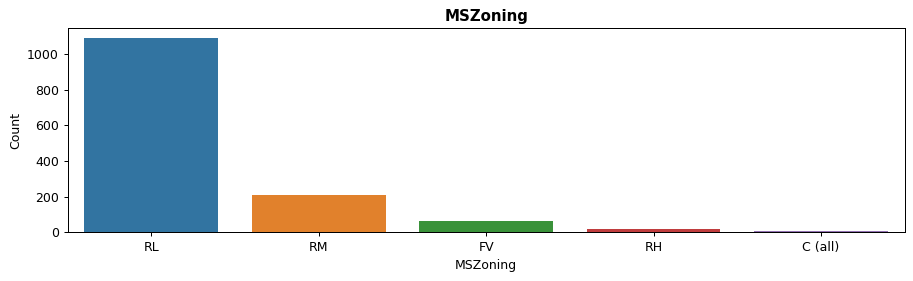



----------------------------------------------  Street  -----------------------------------------------
Pave    1387
Grvl       3
Name: Street, dtype: int64


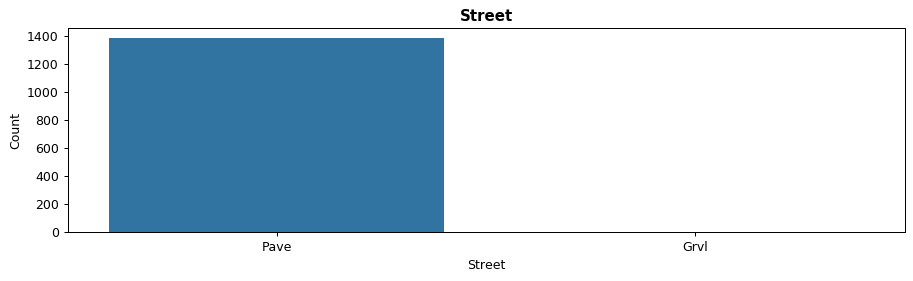



----------------------------------------------  LotShape  -----------------------------------------------
Reg    892
IR1    456
IR2     34
IR3      8
Name: LotShape, dtype: int64


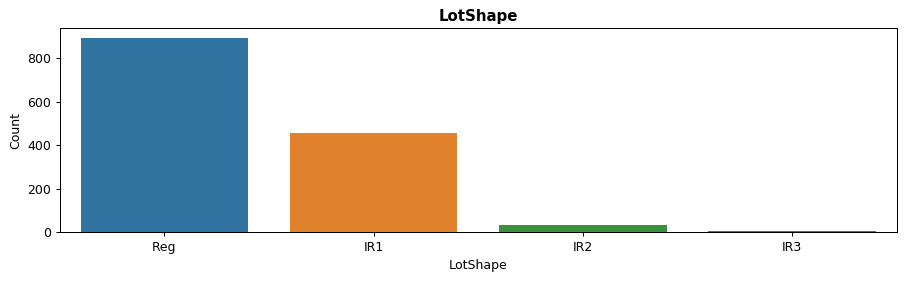



----------------------------------------------  LandContour  -----------------------------------------------
Lvl    1258
Bnk      58
HLS      47
Low      27
Name: LandContour, dtype: int64


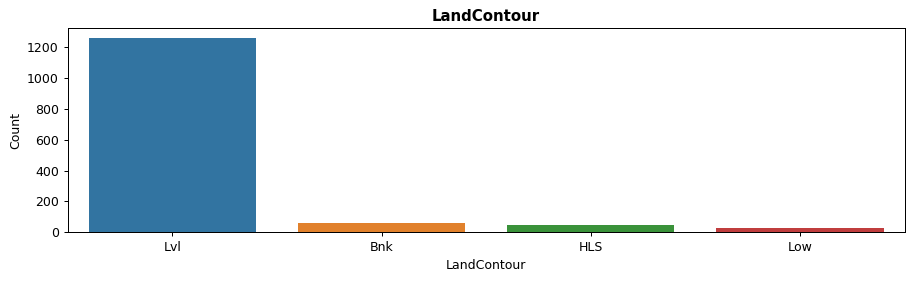



----------------------------------------------  Utilities  -----------------------------------------------
AllPub    1389
NoSeWa       1
Name: Utilities, dtype: int64


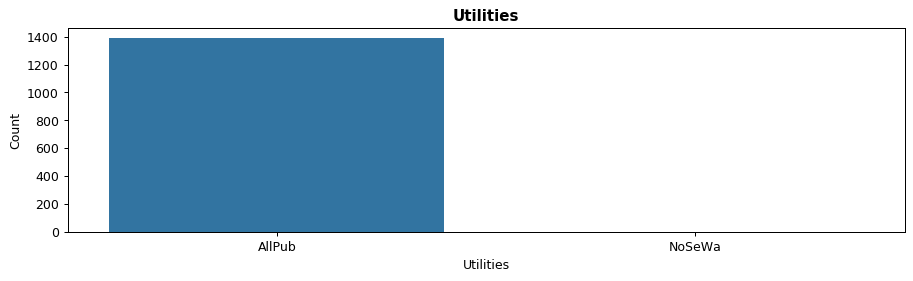



----------------------------------------------  LotConfig  -----------------------------------------------
Inside     1009
Corner      247
CulDSac      85
FR2          45
FR3           4
Name: LotConfig, dtype: int64


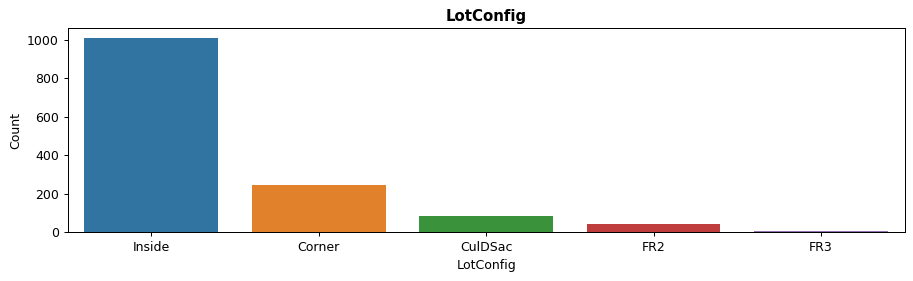



----------------------------------------------  LandSlope  -----------------------------------------------
Gtl    1325
Mod      58
Sev       7
Name: LandSlope, dtype: int64


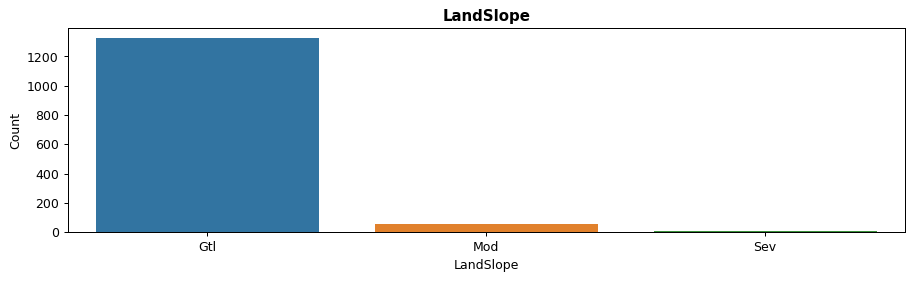



----------------------------------------------  Neighborhood  -----------------------------------------------
NAmes      211
CollgCr    148
OldTown    108
Edwards     94
Somerst     86
NridgHt     77
Gilbert     76
Sawyer      69
NWAmes      67
SawyerW     58
BrkSide     54
Crawfor     50
Mitchel     44
NoRidge     39
Timber      35
IDOTRR      34
SWISU       25
StoneBr     24
ClearCr     20
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     10
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


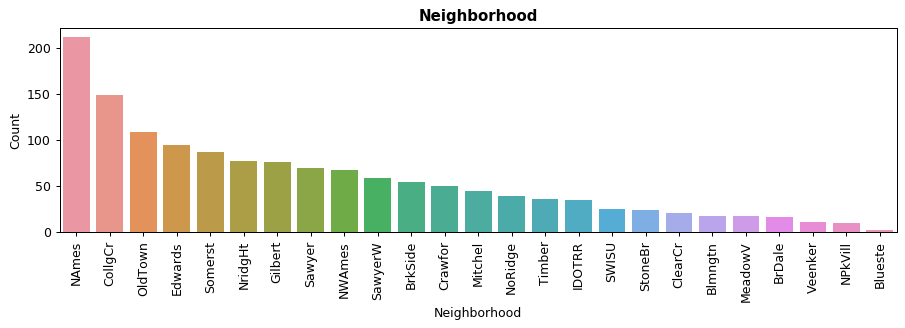



----------------------------------------------  Condition1  -----------------------------------------------
Norm      1204
Feedr       74
Artery      45
RRAn        24
PosN        17
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


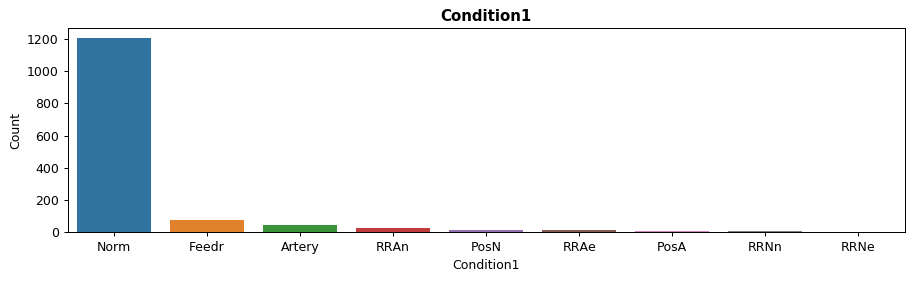



----------------------------------------------  Condition2  -----------------------------------------------
Norm      1378
Feedr        5
RRNn         2
Artery       2
RRAn         1
PosN         1
PosA         1
Name: Condition2, dtype: int64


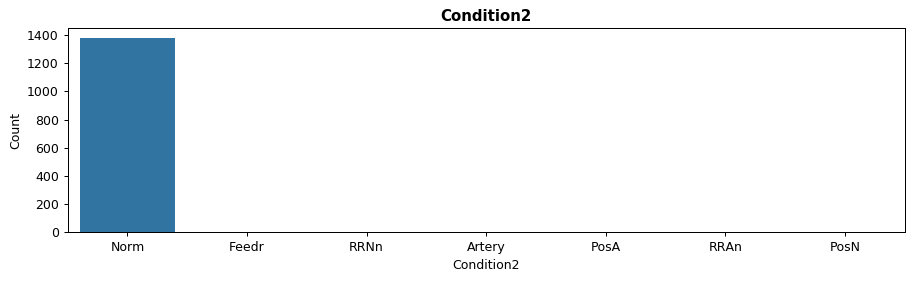



----------------------------------------------  BldgType  -----------------------------------------------
1Fam      1155
TwnhsE     114
Duplex      49
Twnhs       43
2fmCon      29
Name: BldgType, dtype: int64


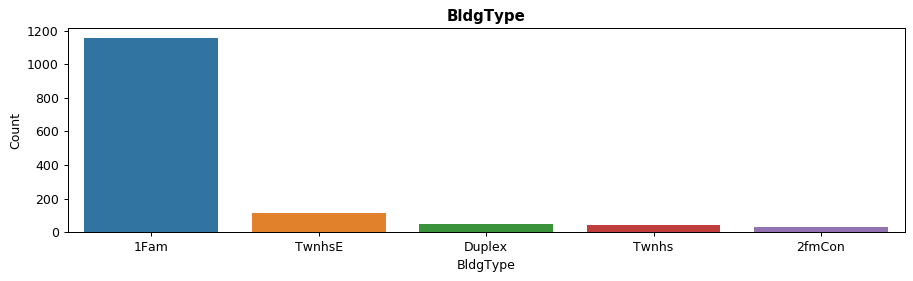



----------------------------------------------  HouseStyle  -----------------------------------------------
1Story    692
2Story    427
1.5Fin    142
SLvl       61
SFoyer     35
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


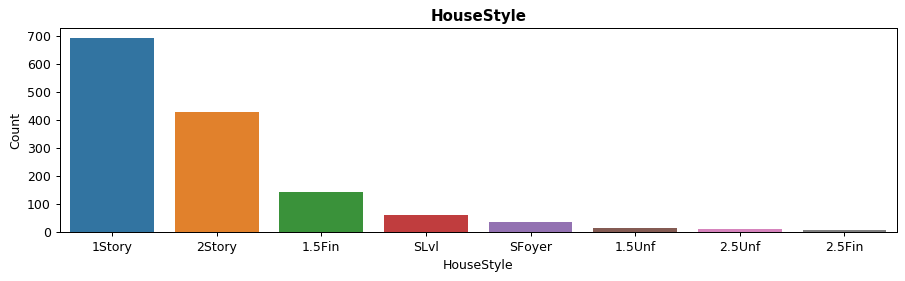



----------------------------------------------  OverallQual  -----------------------------------------------
5     377
6     352
7     308
8     164
4     109
9      42
3      18
10     15
2       3
1       2
Name: OverallQual, dtype: int64


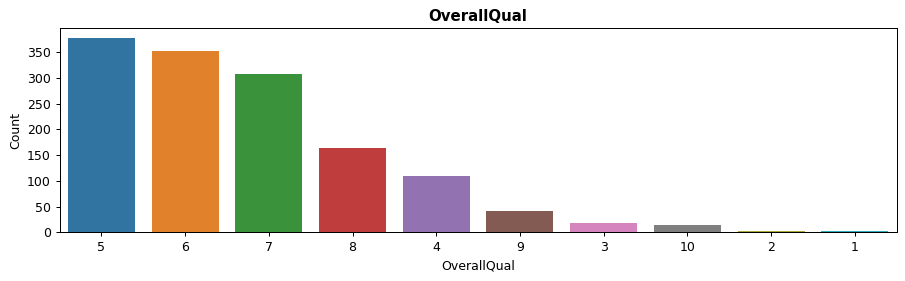



----------------------------------------------  OverallCond  -----------------------------------------------
5    794
6    236
7    188
8     67
4     54
3     25
9     21
2      4
1      1
Name: OverallCond, dtype: int64


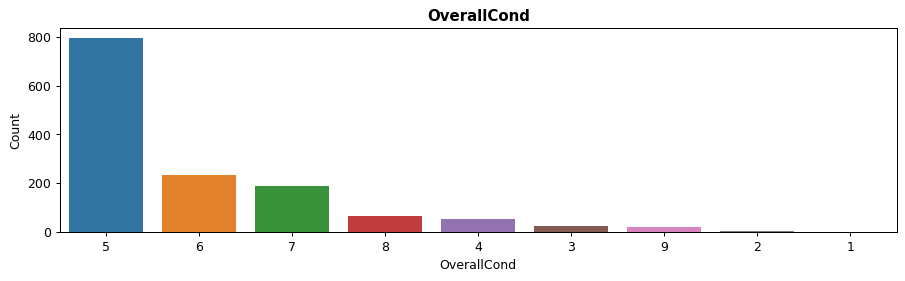



----------------------------------------------  RoofStyle  -----------------------------------------------
Gable      1093
Hip         269
Gambrel      11
Flat         10
Mansard       6
Shed          1
Name: RoofStyle, dtype: int64


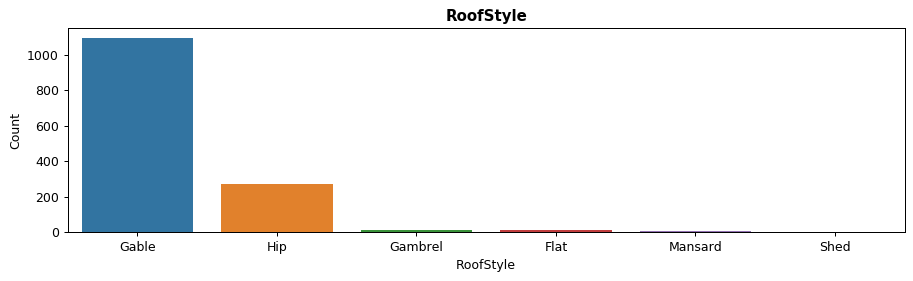



----------------------------------------------  RoofMatl  -----------------------------------------------
CompShg    1370
Tar&Grv       9
WdShake       5
WdShngl       4
Roll          1
Metal         1
Name: RoofMatl, dtype: int64


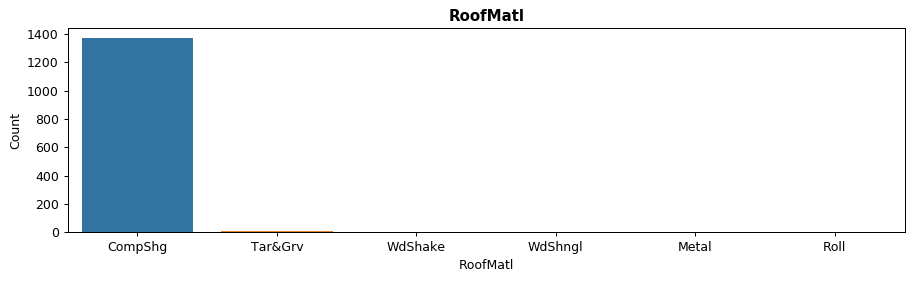



----------------------------------------------  Exterior1st  -----------------------------------------------
VinylSd    505
HdBoard    209
MetalSd    208
Wd Sdng    190
Plywood     97
CemntBd     58
BrkFace     48
WdShing     25
Stucco      23
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64


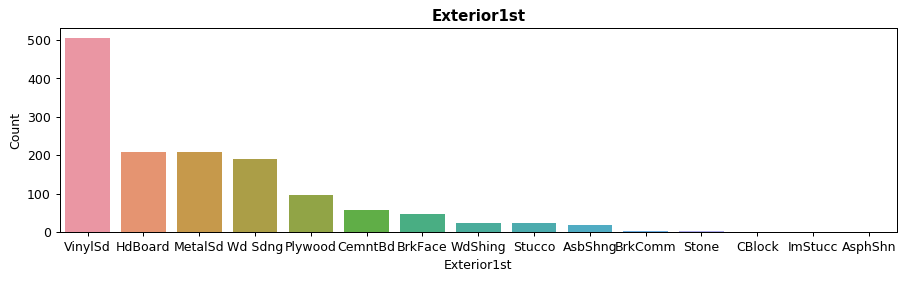



----------------------------------------------  Exterior2nd  -----------------------------------------------
VinylSd    495
MetalSd    202
HdBoard    194
Wd Sdng    183
Plywood    129
CmentBd     58
Wd Shng     35
Stucco      24
BrkFace     24
AsbShng     20
ImStucc      9
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


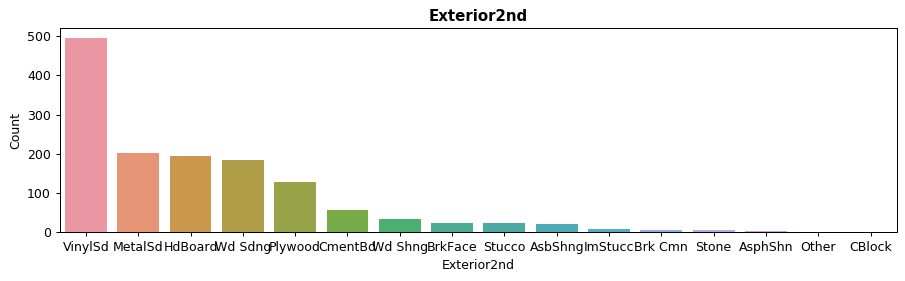



----------------------------------------------  MasVnrType  -----------------------------------------------
None       822
BrkFace    431
Stone      124
BrkCmn      13
Name: MasVnrType, dtype: int64


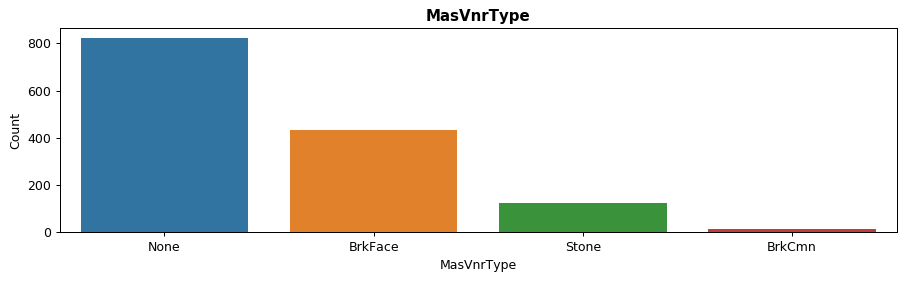



----------------------------------------------  ExterQual  -----------------------------------------------
TA    857
Gd    475
Ex     47
Fa     11
Name: ExterQual, dtype: int64


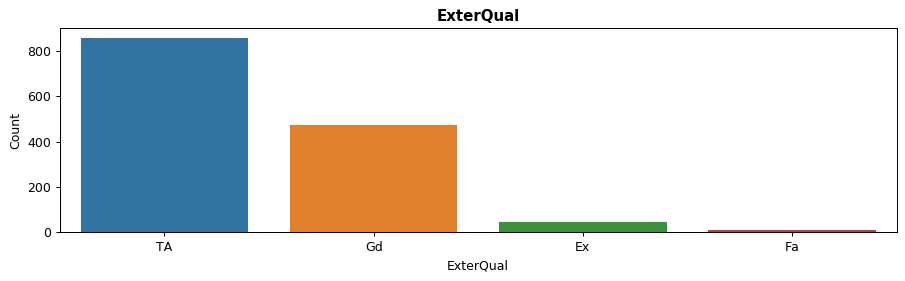



----------------------------------------------  ExterCond  -----------------------------------------------
TA    1222
Gd     138
Fa      27
Ex       3
Name: ExterCond, dtype: int64


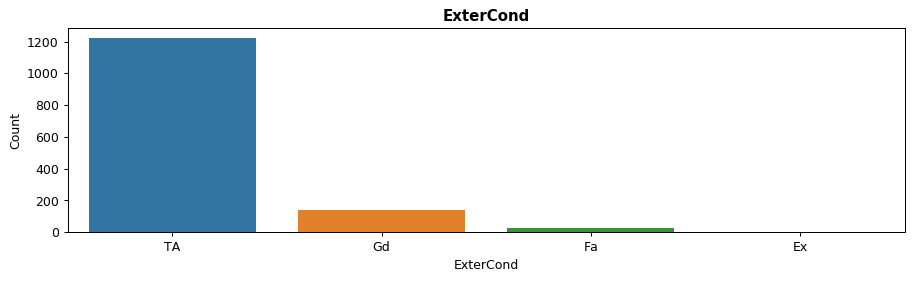



----------------------------------------------  Foundation  -----------------------------------------------
PConc     632
CBlock    591
BrkTil    139
Slab       21
Stone       5
Wood        2
Name: Foundation, dtype: int64


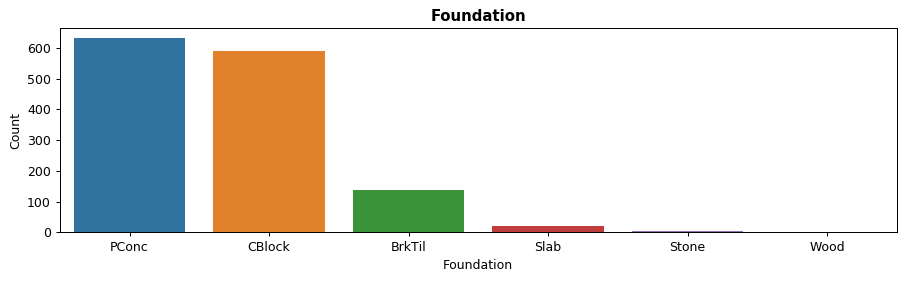



----------------------------------------------  BsmtQual  -----------------------------------------------
TA    649
Gd    592
Ex    117
Fa     32
Name: BsmtQual, dtype: int64


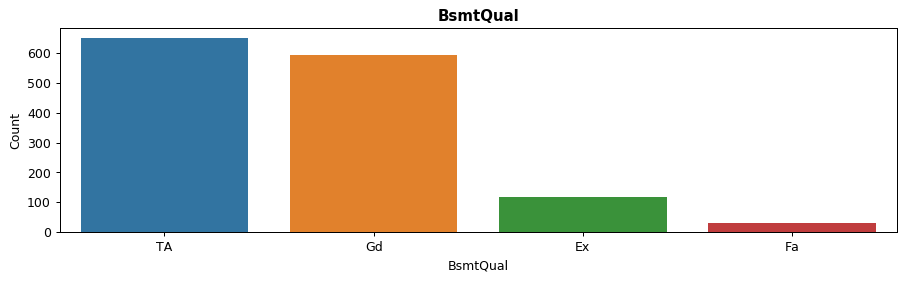



----------------------------------------------  BsmtCond  -----------------------------------------------
TA    1282
Gd      62
Fa      44
Po       2
Name: BsmtCond, dtype: int64


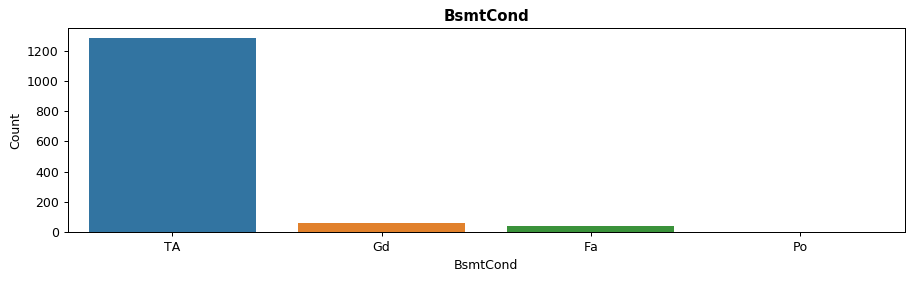



----------------------------------------------  BsmtExposure  -----------------------------------------------
No    949
Av    211
Gd    122
Mn    108
Name: BsmtExposure, dtype: int64


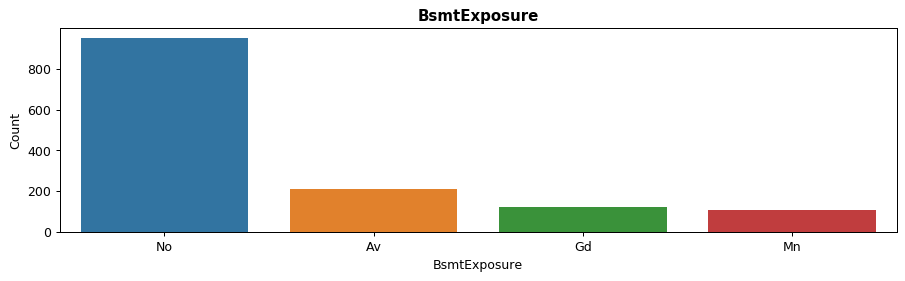



----------------------------------------------  BsmtFinType1  -----------------------------------------------
Unf    450
GLQ    402
ALQ    199
BLQ    139
Rec    129
LwQ     71
Name: BsmtFinType1, dtype: int64


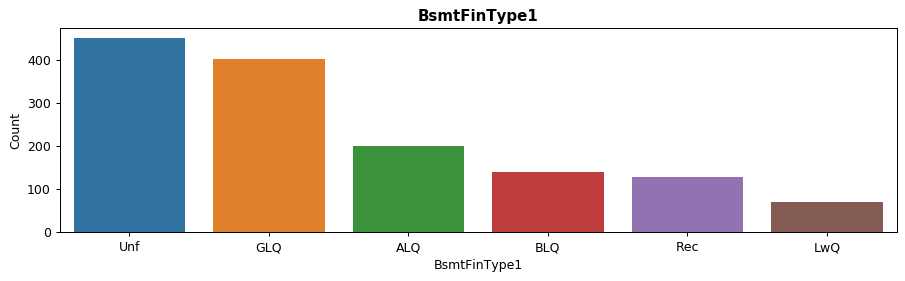



----------------------------------------------  BsmtFinType2  -----------------------------------------------
Unf    1239
Rec      49
LwQ      41
BLQ      30
ALQ      19
GLQ      12
Name: BsmtFinType2, dtype: int64


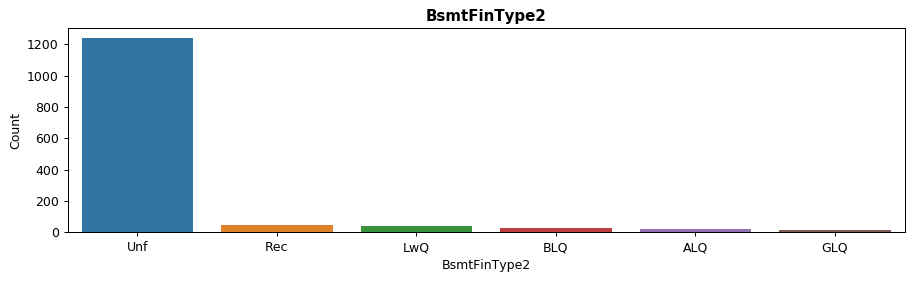



----------------------------------------------  Heating  -----------------------------------------------
GasA     1360
GasW       16
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


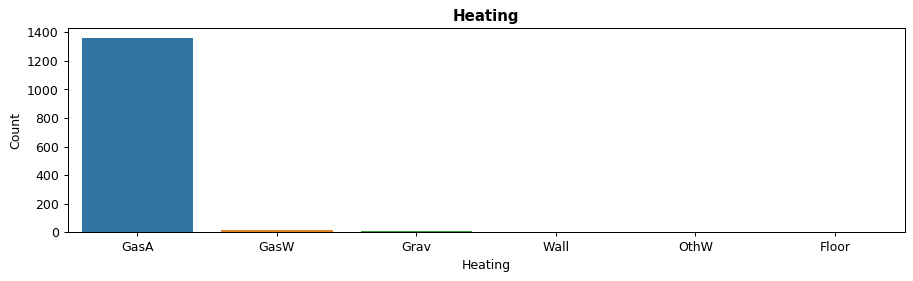



----------------------------------------------  HeatingQC  -----------------------------------------------
Ex    712
TA    403
Gd    230
Fa     44
Po      1
Name: HeatingQC, dtype: int64


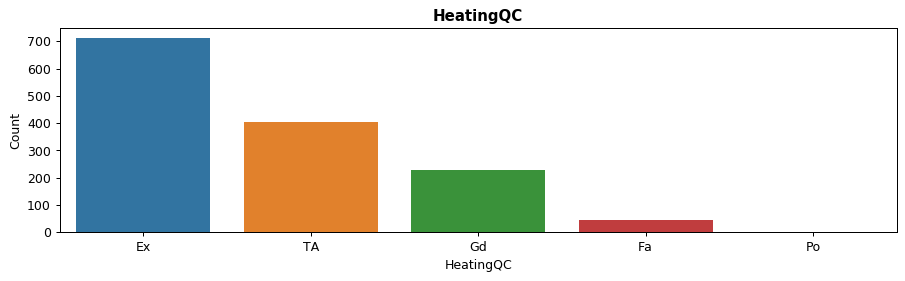



----------------------------------------------  CentralAir  -----------------------------------------------
Y    1299
N      91
Name: CentralAir, dtype: int64


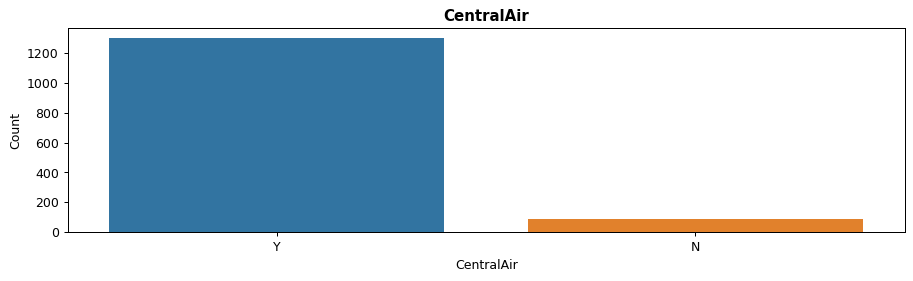



----------------------------------------------  Electrical  -----------------------------------------------
SBrkr    1266
FuseA      92
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


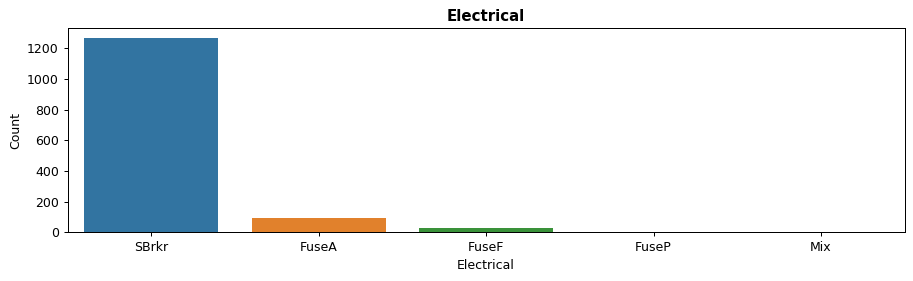



----------------------------------------------  BsmtFullBath  -----------------------------------------------
0    822
1    557
2     10
3      1
Name: BsmtFullBath, dtype: int64


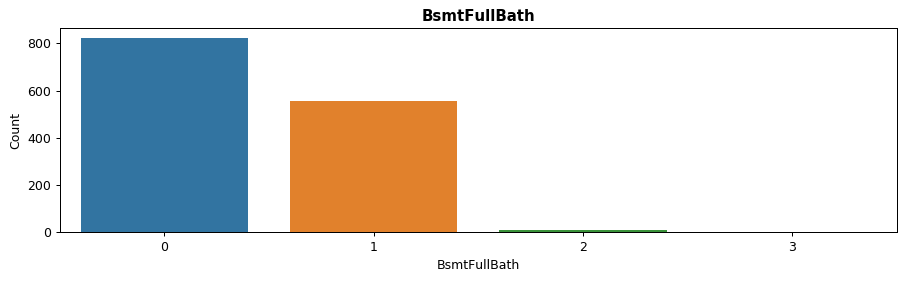



----------------------------------------------  BsmtHalfBath  -----------------------------------------------
0    1314
1      74
2       2
Name: BsmtHalfBath, dtype: int64


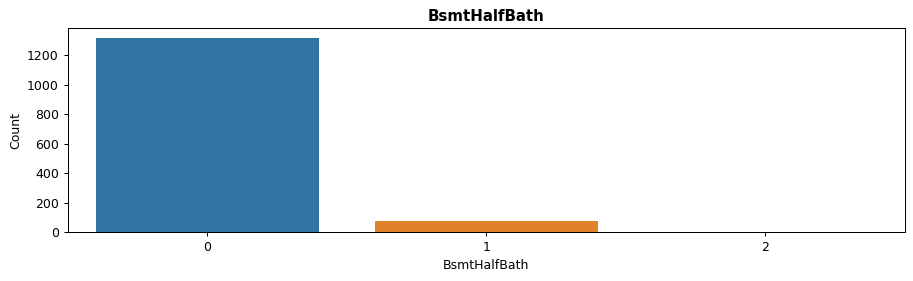



----------------------------------------------  FullBath  -----------------------------------------------
2    739
1    616
3     28
0      7
Name: FullBath, dtype: int64


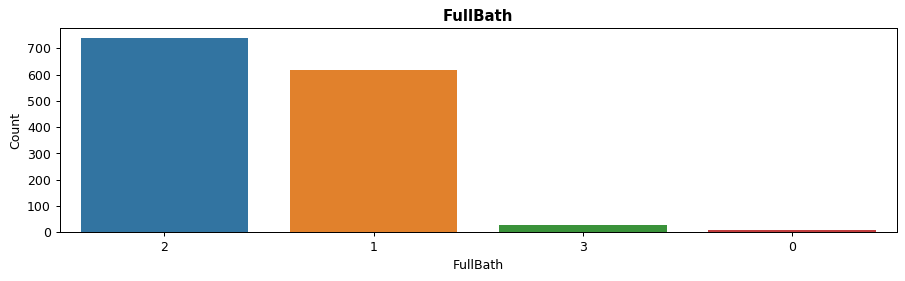



----------------------------------------------  HalfBath  -----------------------------------------------
0    866
1    513
2     11
Name: HalfBath, dtype: int64


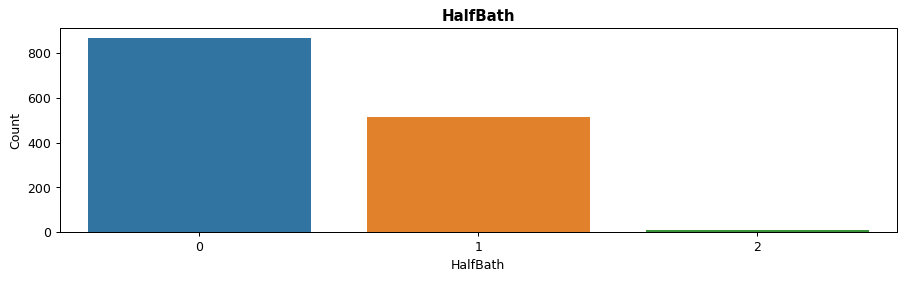



----------------------------------------------  BedroomAbvGr  -----------------------------------------------
3    769
2    342
4    200
1     49
5     18
6      7
0      4
8      1
Name: BedroomAbvGr, dtype: int64


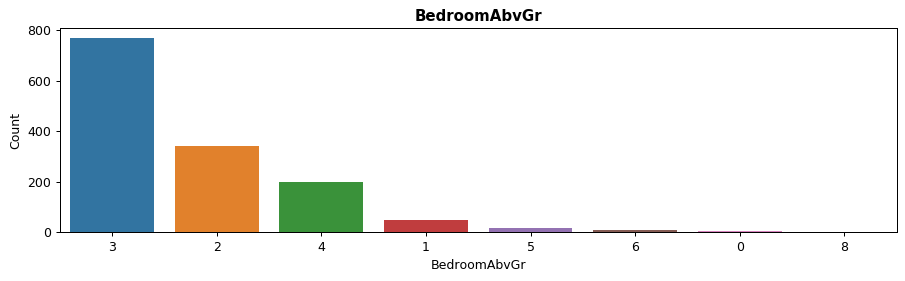



----------------------------------------------  KitchenAbvGr  -----------------------------------------------
1    1326
2      61
3       2
0       1
Name: KitchenAbvGr, dtype: int64


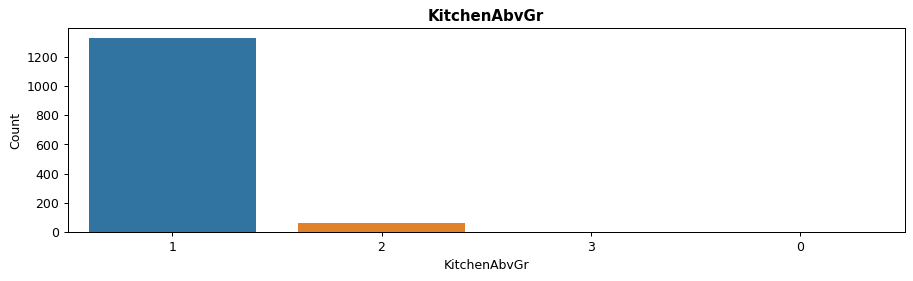



----------------------------------------------  KitchenQual  -----------------------------------------------
TA    694
Gd    565
Ex     96
Fa     35
Name: KitchenQual, dtype: int64


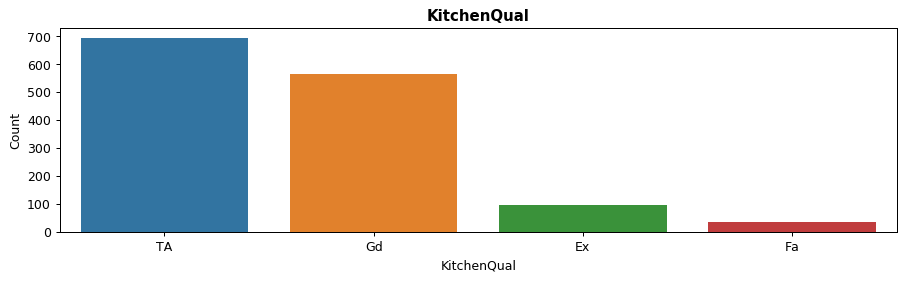



----------------------------------------------  TotRmsAbvGrd  -----------------------------------------------
6     381
7     315
5     260
8     179
4      94
9      73
10     45
11     17
3      17
12      7
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64


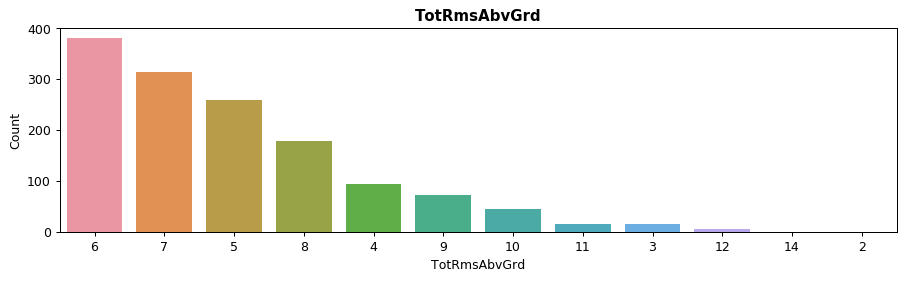



----------------------------------------------  Functional  -----------------------------------------------
Typ     1304
Min2      32
Min1      25
Maj1      14
Mod        9
Maj2       5
Sev        1
Name: Functional, dtype: int64


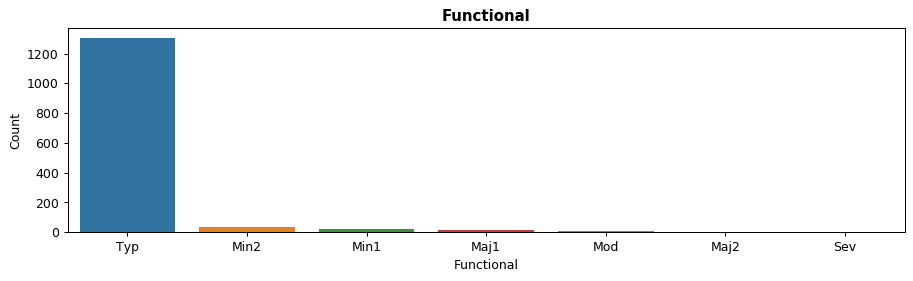



----------------------------------------------  Fireplaces  -----------------------------------------------
0    662
1    625
2     99
3      4
Name: Fireplaces, dtype: int64


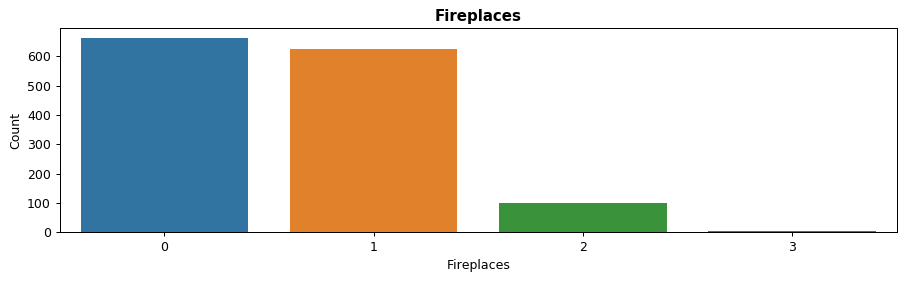



----------------------------------------------  GarageType  -----------------------------------------------
Attchd     907
Detchd     370
BuiltIn     83
Basment     17
CarPort      7
2Types       6
Name: GarageType, dtype: int64


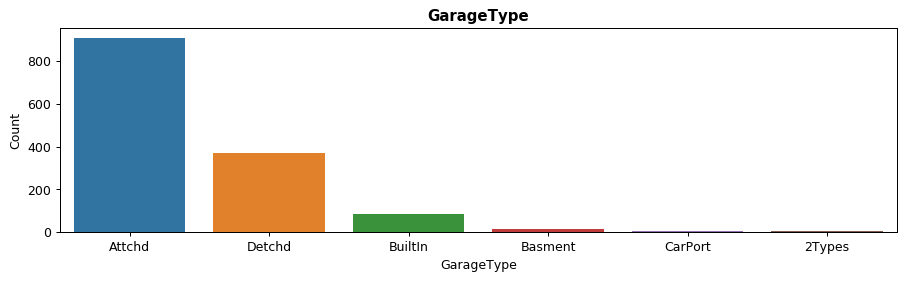



----------------------------------------------  GarageFinish  -----------------------------------------------
Unf    654
RFn    400
Fin    336
Name: GarageFinish, dtype: int64


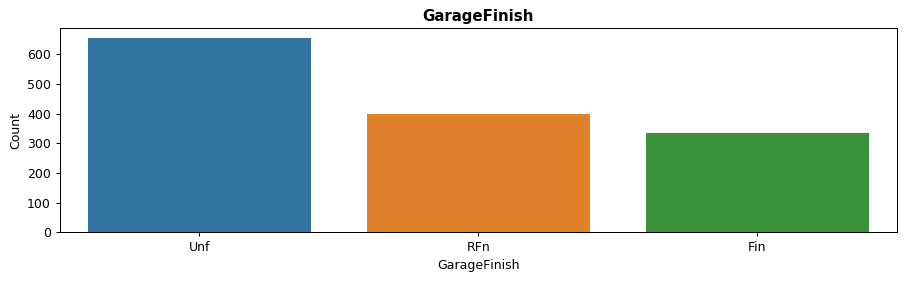



----------------------------------------------  GarageCars  -----------------------------------------------
2    782
1    350
3    175
0     78
4      5
Name: GarageCars, dtype: int64


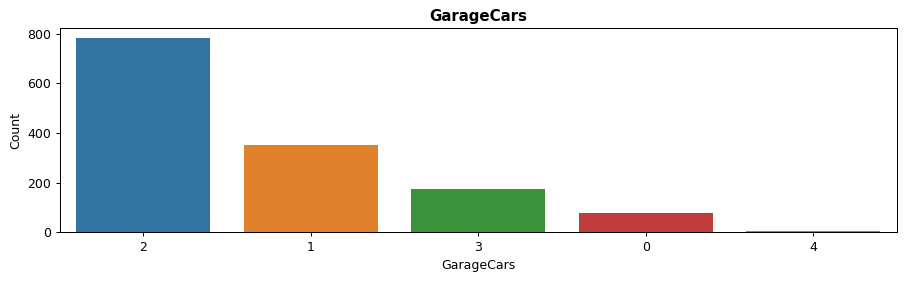



----------------------------------------------  GarageQual  -----------------------------------------------
TA    1329
Fa      43
Gd      13
Po       3
Ex       2
Name: GarageQual, dtype: int64


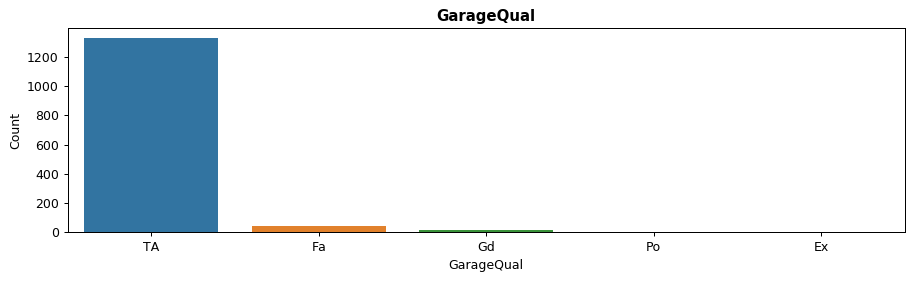



----------------------------------------------  GarageCond  -----------------------------------------------
TA    1341
Fa      33
Gd       8
Po       7
Ex       1
Name: GarageCond, dtype: int64


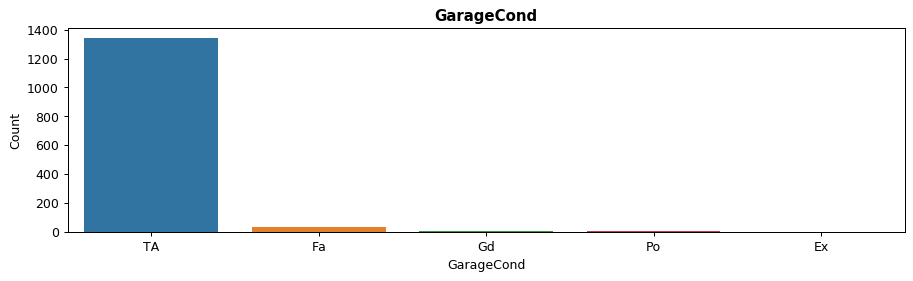



----------------------------------------------  PavedDrive  -----------------------------------------------
Y    1276
N      85
P      29
Name: PavedDrive, dtype: int64


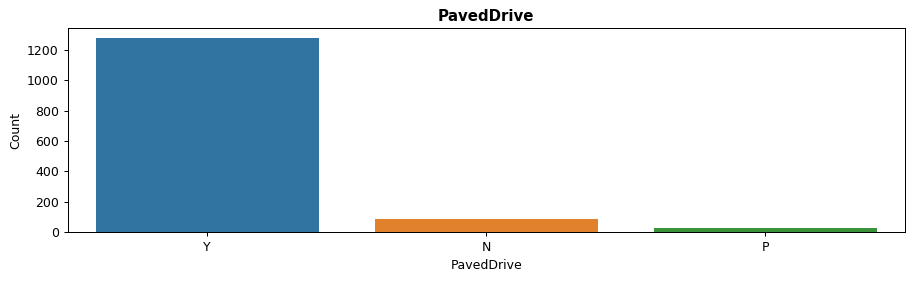



----------------------------------------------  MoSold  -----------------------------------------------
6     240
7     224
5     195
4     135
8     114
3      99
10     84
11     74
9      60
12     58
1      55
2      52
Name: MoSold, dtype: int64


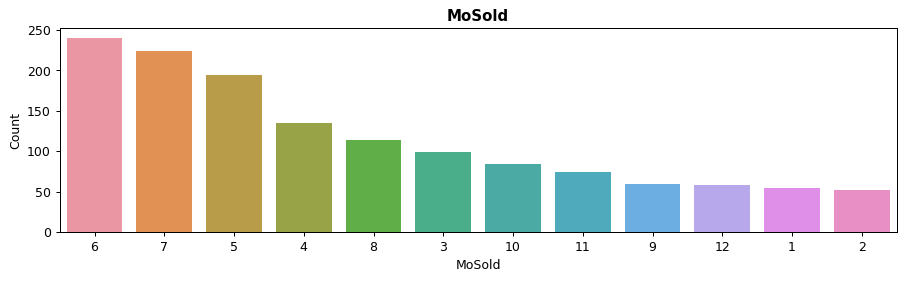



----------------------------------------------  SaleType  -----------------------------------------------
WD       1203
New       120
COD        41
ConLD       8
ConLw       5
ConLI       4
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


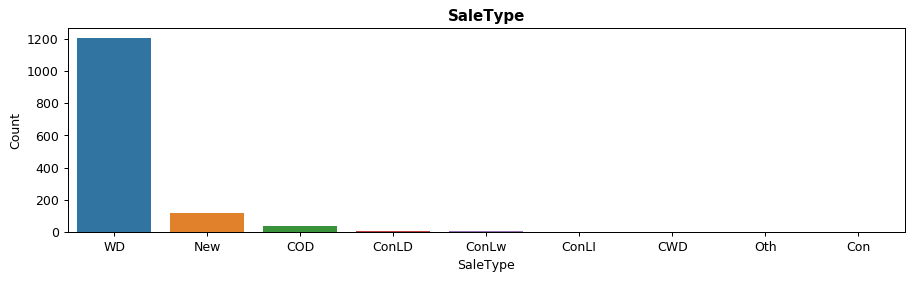



----------------------------------------------  SaleCondition  -----------------------------------------------
Normal     1136
Partial     123
Abnorml      97
Family       20
Alloca       10
AdjLand       4
Name: SaleCondition, dtype: int64


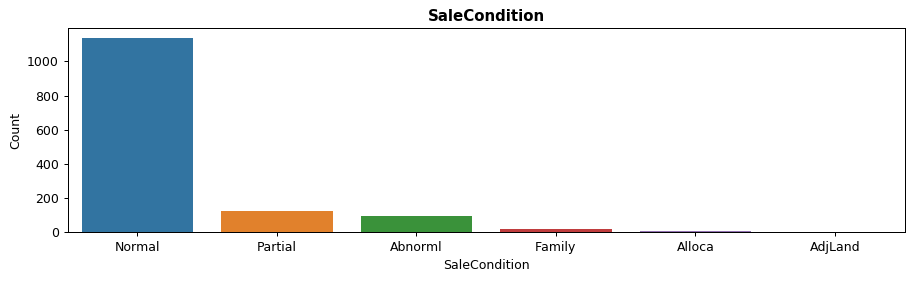

In [395]:
# list of categorical columns
categ_var = df.select_dtypes(include=['object']).columns
# Visualise the data
categorical_data(categ_var)

In [396]:
# As per the above graph Street and utilities has lower variance so dorpping it
df.drop(['Street','Utilities'],axis=1,inplace=True)

In [397]:
# Boxplot graph for the Categorical Variables

# def draw_boxplot(cols):
#     int_range = range(len(cols))[::2]
#     col_length = len(cols)
#     for col in int_range:
#         print('------------------------- ',cols[col:col+2],' -------------------------------')
#         plt.figure(figsize=(20, 3))
#         if col < col_length:  
#             plt.subplot(1,2,1)
#             sns.boxplot(x=cols[col], y='SalePrice', data=df)
#         if col+1 < col_length:                    
#             plt.subplot(1,2,2)
#             sns.boxplot(x=cols[col+1], y='SalePrice', data=df)
# #         if col+2 < col_length:                
# #             plt.subplot(1,3,3)
# #             sns.boxplot(x=cols[col+2], y='SalePrice', data=df)
                        
#         plt.show()


In [398]:
# Draw box plot with respect to the SalePrice for the categorical data
# categ_var = df.select_dtypes(include=['object']).columns
# draw_boxplot(categ_var)

#### Numerical

In [399]:
# Draw pairplot to check the linearity and relation of the variable with the SalePrice.

# It's taking time to load so drawing scatter graph using custom method 
# sns.pairplot(df[num_cols])
# plt.show()

In [400]:
# Numerical variable analysis using pairplots
def numerical_data(cols):
    int_range = range(len(cols))[::3]
    col_length = len(cols)
    for col in int_range:
        print('------------------ ',cols[col:col+3],' ---------------------')
        sns.pairplot(df, x_vars=cols[col:col+3], y_vars='SalePrice',height=4, aspect=1,kind='scatter')            
        plt.show()


In [401]:
# List of numeric columns 
num_cols=df.select_dtypes(include=['int64', 'float']).columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'SalePrice', 'AgeYearBuilt', 'AgeYearRemodAdd', 'AgeGarageYrBlt',
       'AgeYrSold'],
      dtype='object')

In [402]:
num_cols = num_cols.drop(labels='SalePrice')
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'AgeYearBuilt', 'AgeYearRemodAdd', 'AgeGarageYrBlt', 'AgeYrSold'],
      dtype='object')

------------------  Index(['MSSubClass', 'LotFrontage', 'LotArea'], dtype='object')  ---------------------


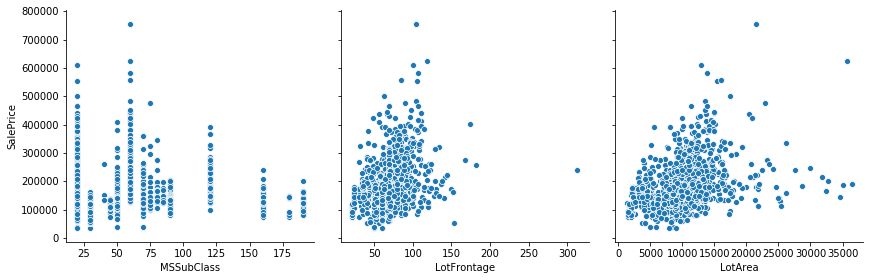

------------------  Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2'], dtype='object')  ---------------------


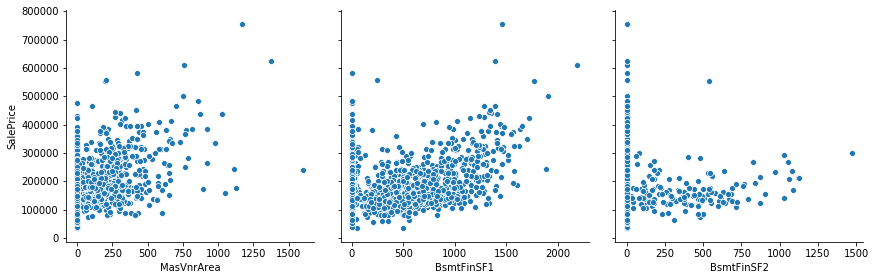

------------------  Index(['BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF'], dtype='object')  ---------------------


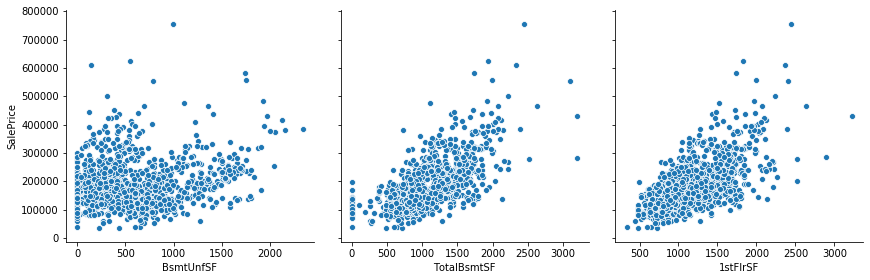

------------------  Index(['2ndFlrSF', 'GrLivArea', 'GarageArea'], dtype='object')  ---------------------


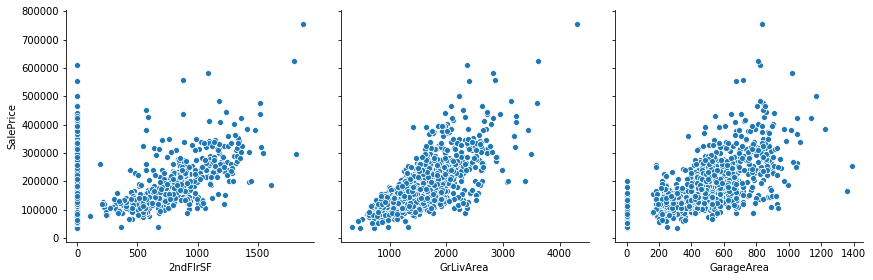

------------------  Index(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'], dtype='object')  ---------------------


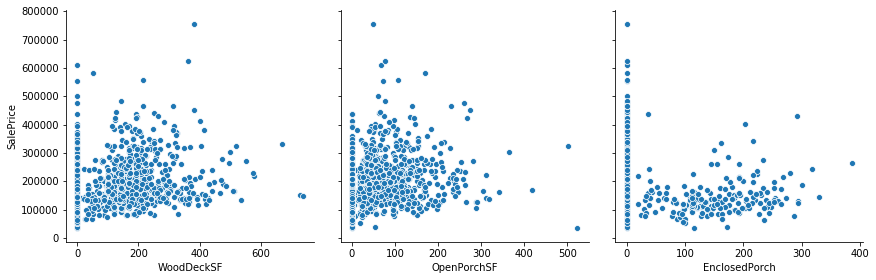

------------------  Index(['AgeYearBuilt', 'AgeYearRemodAdd', 'AgeGarageYrBlt'], dtype='object')  ---------------------


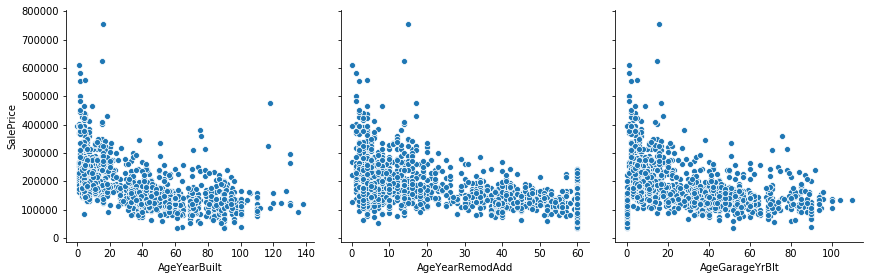

------------------  Index(['AgeYrSold'], dtype='object')  ---------------------


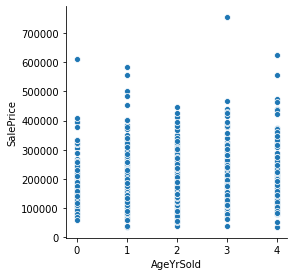

In [403]:
# Check the numerical values using pairplots

# Target variable SalePrice and other variables
numerical_data(num_cols)

- 1stFlrSF, GrLivArea seems to be correlated towards right

In [404]:

# Numerical variable analysis
# def scatter_graph_numeric_data(cols):
#     int_range = range(len(cols))[::3]
#     col_length = len(cols)
#     for col in int_range:
#         print('------------------------- ',list(cols[col:col+3]),' -------------------------------')
#         plt.figure(figsize=(20, 3))
#         if col < col_length:  
#             plt.subplot(1,3,1)
#             sns.scatterplot(x=df[cols[col]], y=df['SalePrice'])
#         if col+1 < col_length:                    
#             plt.subplot(1,3,2)
#             sns.scatterplot(x=df[cols[col+1]], y=df['SalePrice'])
#         if col+2 < col_length:                
#             plt.subplot(1,3,3)
#             sns.scatterplot(x=df[cols[col+2]], y=df['SalePrice'])
                        
#         plt.show()
        


In [405]:
# For the better view created the scatter graph using custom method 
# scatter_graph_numeric_data(num_cols)

In [406]:
# correlation table to check the correlation for the variable with others
df.corr()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,AgeYearBuilt,AgeYearRemodAdd,AgeGarageYrBlt,AgeYrSold
MSSubClass,1.000000,-0.388711,-0.342968,0.022579,-0.075767,-0.062261,-0.144766,-0.259217,-0.266408,0.306273,0.070840,-0.102716,-0.021872,-0.009711,-0.013740,-0.090796,-0.022833,-0.038622,-0.095614,0.024746
LotFrontage,-0.388711,1.000000,0.529785,0.167115,0.121164,0.034028,0.143064,0.293688,0.366273,0.048259,0.317353,0.301772,0.083781,0.117221,-0.015761,0.353014,-0.118829,-0.080633,-0.034608,-0.011999
LotArea,-0.342968,0.529785,1.000000,0.159315,0.191532,0.065029,0.083374,0.314501,0.411500,0.097421,0.393422,0.315244,0.170396,0.143492,-0.013114,0.388366,-0.049302,-0.023382,0.029593,0.039214
MasVnrArea,0.022579,0.167115,0.159315,1.000000,0.235270,-0.072487,0.116509,0.342517,0.323661,0.166790,0.379727,0.367629,0.166599,0.106900,-0.112818,0.492188,-0.308671,-0.169883,-0.200693,0.007854
BsmtFinSF1,-0.075767,0.121164,0.191532,0.235270,1.000000,-0.060306,-0.524818,0.450870,0.382088,-0.189560,0.114381,0.264193,0.186892,0.073598,-0.124671,0.386088,-0.249066,-0.121937,-0.112889,-0.016740
BsmtFinSF2,-0.062261,0.034028,0.065029,-0.072487,-0.060306,1.000000,-0.203792,0.104622,0.093877,-0.102888,-0.017668,-0.021975,0.078956,0.007503,0.037454,-0.026123,0.049825,0.072670,0.090724,-0.035074
BsmtUnfSF,-0.144766,0.143064,0.083374,0.116509,-0.524818,-0.203792,1.000000,0.454228,0.344555,0.003653,0.263274,0.194943,0.010003,0.127139,0.006045,0.234136,-0.152745,-0.181831,-0.171708,0.033998
TotalBsmtSF,-0.259217,0.293688,0.314501,0.342517,0.450870,0.104622,0.454228,1.000000,0.805884,-0.233182,0.396352,0.476838,0.235874,0.216723,-0.108711,0.644387,-0.404762,-0.295006,-0.267671,0.005688
1stFlrSF,-0.266408,0.366273,0.411500,0.323661,0.382088,0.093877,0.344555,0.805884,1.000000,-0.251616,0.527843,0.483226,0.228963,0.180636,-0.068399,0.625571,-0.286559,-0.243680,-0.186038,0.002141
2ndFlrSF,0.306273,0.048259,0.097421,0.166790,-0.189560,-0.102888,0.003653,-0.233182,-0.251616,1.000000,0.684007,0.127993,0.080898,0.182089,0.044479,0.301314,-0.000132,-0.130469,-0.046795,0.033349


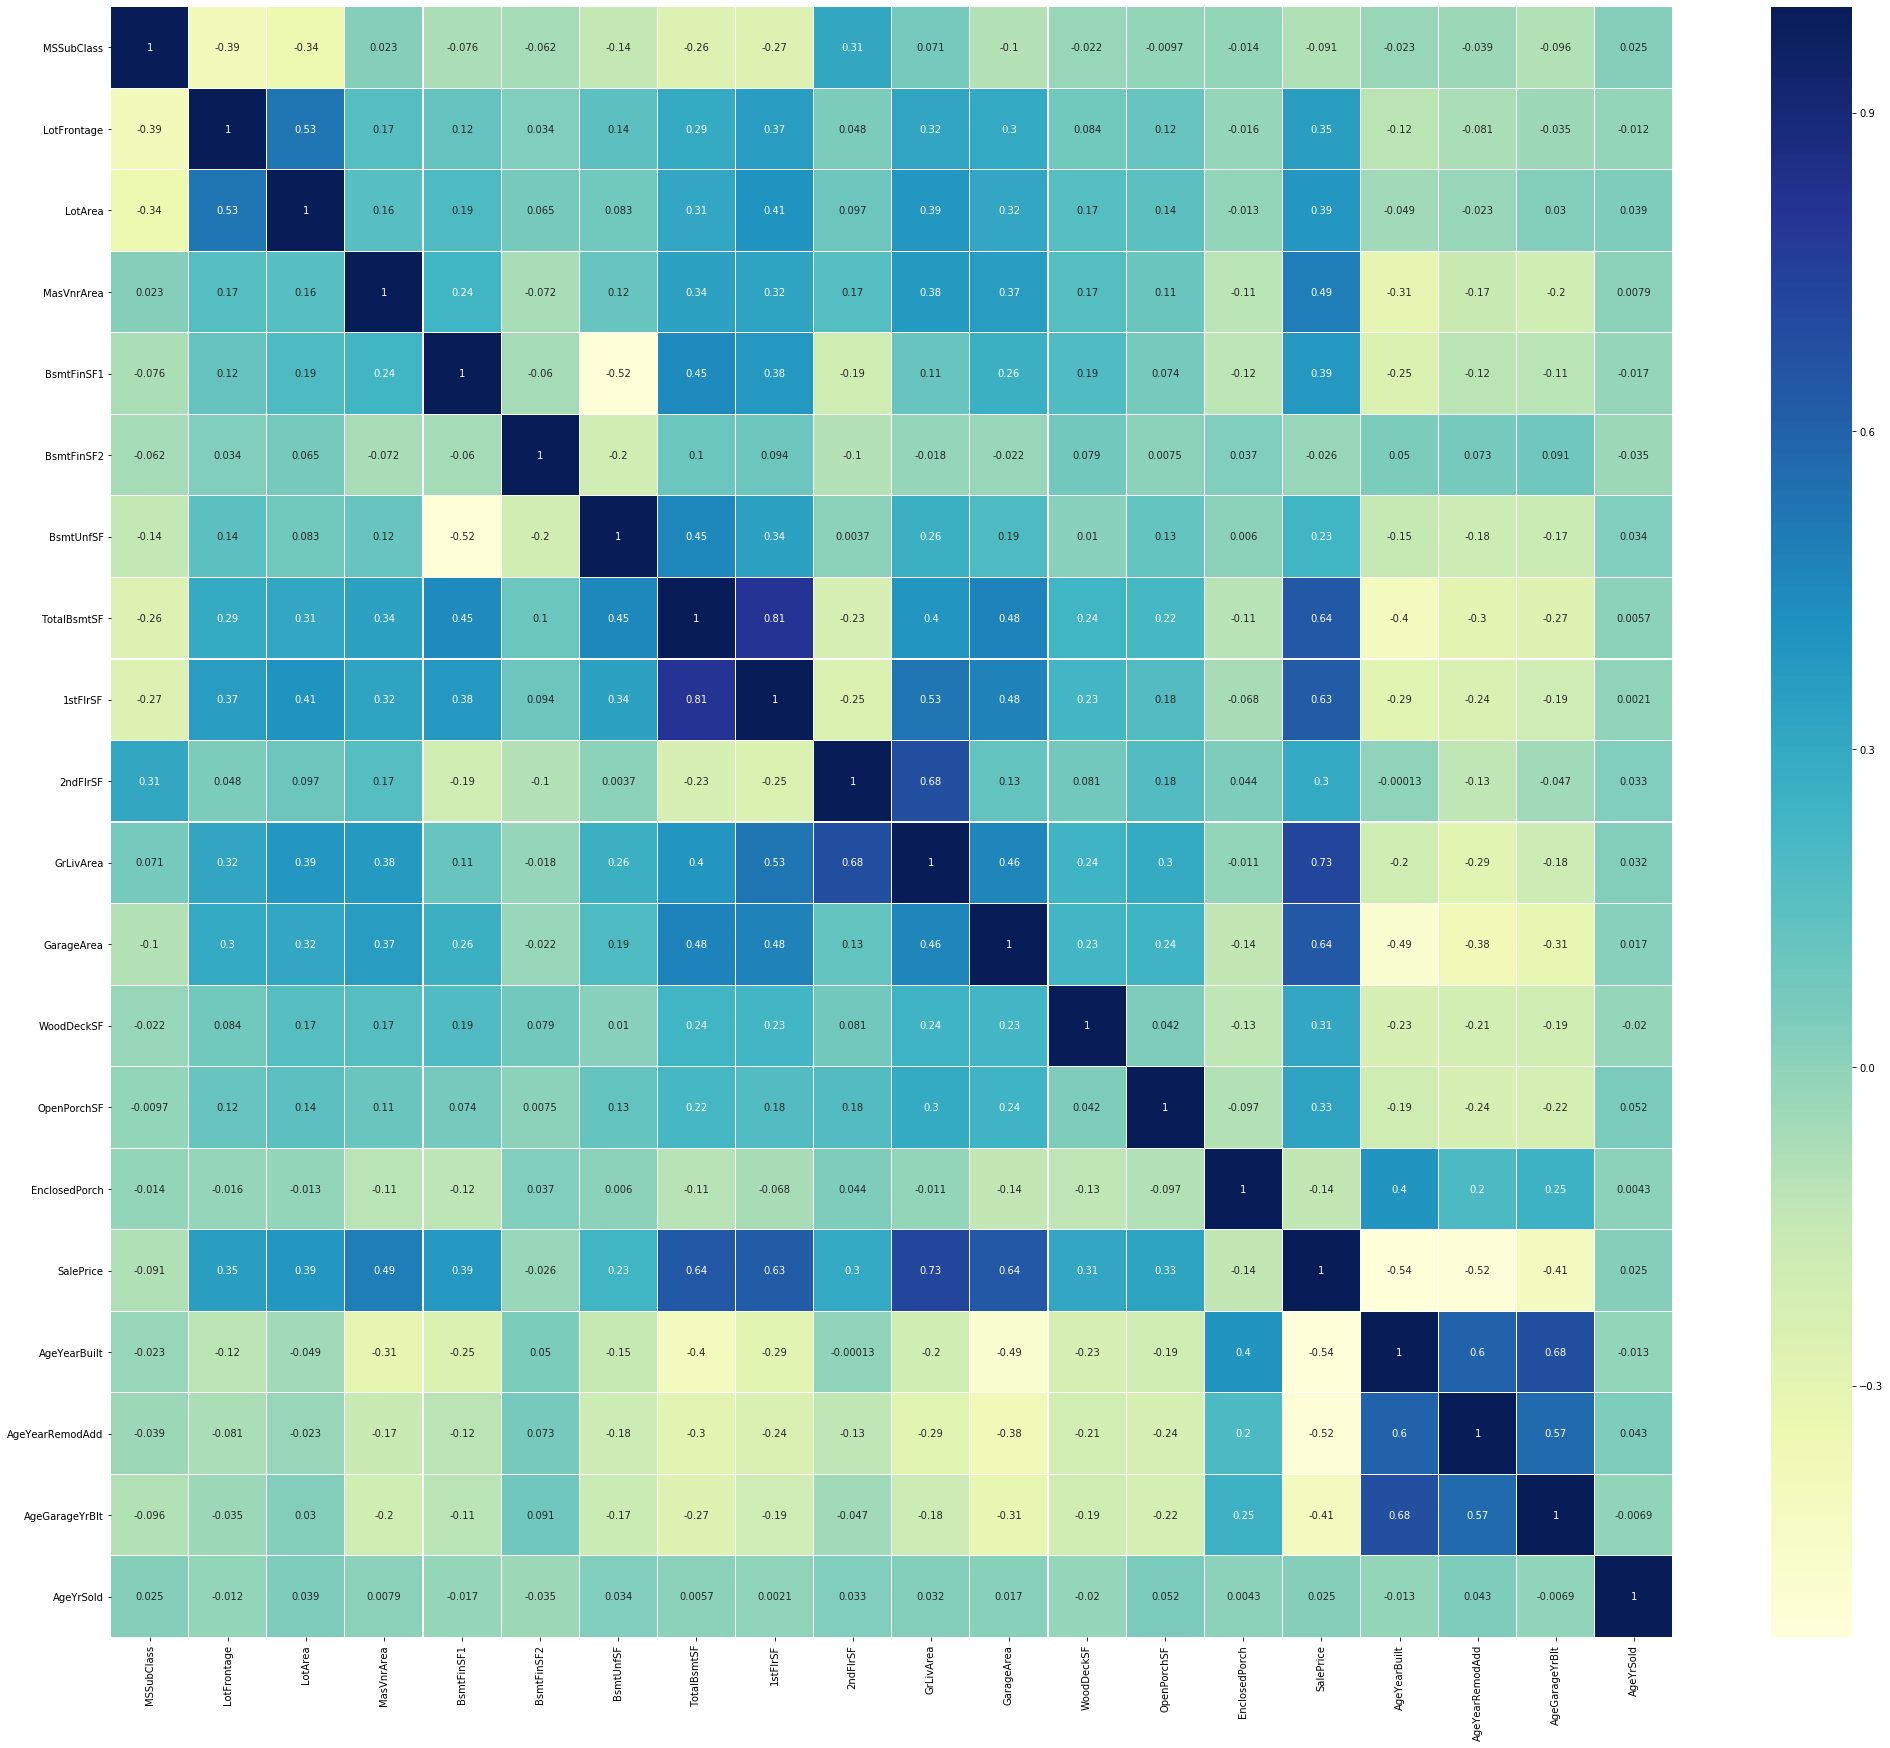

In [407]:
# Heatmap to check correlatoin between the variables 
fig, ax = plt.subplots() 
fig.set_size_inches(35, 30) 
sns.heatmap(df.corr(),cmap ="YlGnBu",linewidths = 0.1, annot = True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.show()

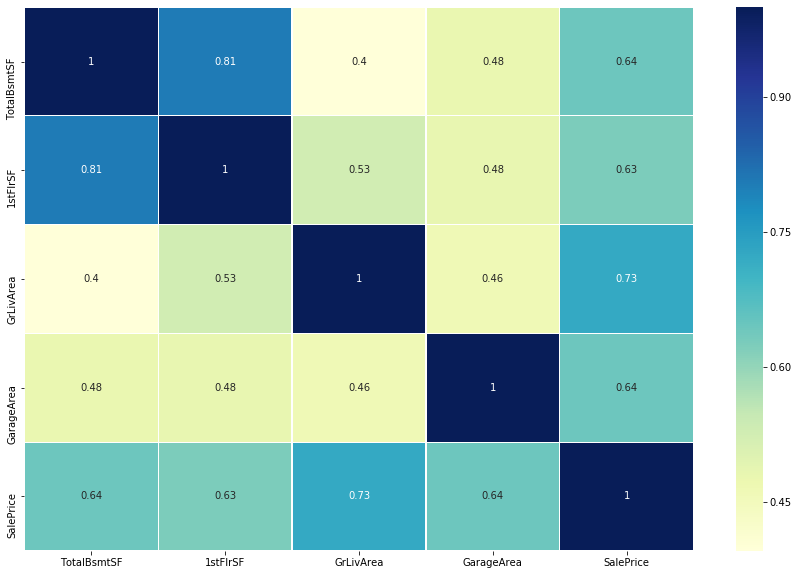

In [408]:
# positive correlation with SalePrice greater than 50%
corr = df.corr()
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
fig, ax = plt.subplots() 
fig.set_size_inches(15, 10) 
top_corr = df[top_feature].corr()
sns.heatmap(top_corr,cmap ="YlGnBu",linewidths = 0.1, annot = True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.show()

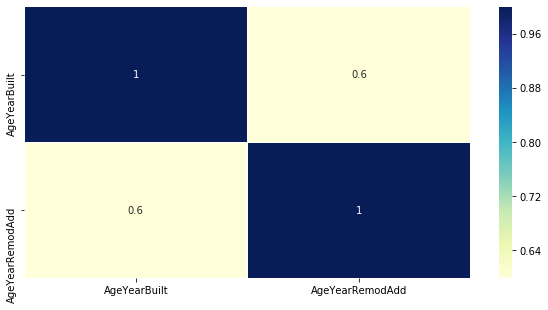

In [409]:
# negative correlation with SalePrice less then -0.5
corr = df.corr()
top_feature = corr.index[abs(corr['SalePrice']<-0.5)]
fig, ax = plt.subplots() 
fig.set_size_inches(10, 5) 
top_corr = df[top_feature].corr()
sns.heatmap(top_corr,cmap ="YlGnBu",linewidths = 0.1, annot = True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.show()

### Data preperation

In [410]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SaleType,SaleCondition,SalePrice,AgeYearBuilt,AgeYearRemodAdd,AgeGarageYrBlt,AgeYrSold
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,12,WD,Normal,250000,10,10,10.0,2


In [411]:
# Dividing dataframe into X and Y sets for the model building
X=df.drop(columns=['SalePrice'])
y=np.log(df['SalePrice'])

In [412]:
categorical_data = X.select_dtypes(include=['object'])
categorical_data.head(3)

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,TA,TA,Y,2,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,TA,TA,Y,5,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,TA,TA,Y,9,WD,Normal


### Dummy Variables

In [413]:
# Use pandas library to create the dummy variables
dummies = pd.get_dummies(categorical_data, drop_first=True)
dummies.head(15)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,...,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
8,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
10,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
11,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0

In [414]:
# drop categorical data for that dummy variable has created
X=X.drop(columns=categorical_data)
X.head(3)

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,AgeYearBuilt,AgeYearRemodAdd,AgeGarageYrBlt,AgeYrSold
0,60,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,7,7,7.0,2
1,20,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,34,34,34.0,3
2,60,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,9,8,9.0,2


In [415]:
# concat dummies with the X numerical variable
X=pd.concat([X,dummies],axis=1)
X.head(3)

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,AgeYearBuilt,AgeYearRemodAdd,AgeGarageYrBlt,AgeYrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,...,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,7,7,7.0,2,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,34,34,34.0,3,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,9,8,9.0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Splitting the Data into Training and Testing Sets

In [416]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [417]:
# Train and test data shape
print(X_train.shape)
print(X_test.shape)

(972, 275)
(417, 275)


### Rescaling the Features 

using scaling from the sklearn.

In [418]:
from sklearn.preprocessing import StandardScaler

In [419]:
num_col=X_train.select_dtypes(include=['int64','float64']).columns
num_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'AgeYearBuilt', 'AgeYearRemodAdd', 'AgeGarageYrBlt', 'AgeYrSold'],
      dtype='object')

In [420]:
# Apply scaler() to all the columns except the dummy variables which we creaeted before
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [421]:
X_train.head(3)

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,AgeYearBuilt,AgeYearRemodAdd,AgeGarageYrBlt,AgeYrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,...,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
167,0.063424,0.782449,0.205331,1.072033,2.026333,-0.302777,-0.621782,1.326713,1.260954,0.513864,1.429189,1.504130,0.780213,1.162844,-0.359326,-1.187517,-1.071474,-1.080997,0.609230,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
644,-0.879563,0.735215,-0.119696,0.310899,1.632074,-0.302777,0.163669,1.788348,1.688281,-0.802230,0.587848,0.038421,0.927953,1.318881,-0.359326,-1.255070,-1.168216,-1.161096,-0.893744,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1288,1.477904,-1.390314,-0.952472,-0.582607,1.719425,-0.302777,-0.512132,1.123493,1.395179,-0.802230,0.359940,0.137391,1.075693,0.211019,-0.359326,-0.951084,-0.732878,-0.800653,-0.893744,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### RFE
Recursive feature elimination

In [422]:
# Importing RFE and LinearRegression from the sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [423]:
# Running RFE with the output number of the variable 
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 25)
rfe = rfe.fit(X_train, y_train)

In [424]:
rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)
rfe_df

,Variable,rfe_support,rfe_ranking
0,GrLivArea,True,1
1,MSZoning_FV,True,1
2,MSZoning_RH,True,1
3,MSZoning_RL,True,1
4,MSZoning_RM,True,1
5,HouseStyle_2.5Fin,True,1
6,OverallQual_2,True,1
7,OverallQual_8,True,1
8,OverallQual_9,True,1
9,OverallQual_10,True,1


In [425]:
# Selected column list 
col = X_train.columns[rfe.support_]
col

Index(['GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'HouseStyle_2.5Fin', 'OverallQual_2', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_3', 'RoofMatl_Metal',
       'Exterior1st_BrkComm', 'Heating_Grav', 'Heating_OthW',
       'Electrical_FuseP', 'BsmtFullBath_3', 'TotRmsAbvGrd_3',
       'TotRmsAbvGrd_4', 'TotRmsAbvGrd_5', 'TotRmsAbvGrd_6', 'TotRmsAbvGrd_7',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_TA'],
      dtype='object')

In [426]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,GrLivArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,HouseStyle_2.5Fin,OverallQual_2,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,RoofMatl_Metal,Exterior1st_BrkComm,Heating_Grav,Heating_OthW,Electrical_FuseP,BsmtFullBath_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,GarageQual_Fa,GarageQual_Gd,GarageQual_TA
167,1.429189,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
644,0.587848,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1288,0.359940,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
937,1.024493,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
348,0.289651,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


### Building model & evaluations using Ridge & Lasso Regression

In [427]:
# import Ridge and Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
# from sklearn.metrics import mean_squared_error

### Ridge

In [428]:
# list of alphas to tune our model
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [429]:
# Ridge 
ridge = Ridge()

In [430]:
# Cross Validation 
folds = 5
RidgeModelCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)           
RidgeModelCV.fit(X_train, y_train) 

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [431]:
#checking the value of optimum number of parameters
print(RidgeModelCV.best_params_)
print(RidgeModelCV.best_score_)

{'alpha': 9.0}
-0.08290867186797365


In [432]:
# Result based on the mean score

RidgeModelCVResults = pd.DataFrame(RidgeModelCV.cv_results_)
RidgeCVResults = RidgeModelCVResults[RidgeModelCVResults['param_alpha']<=200]
RidgeCVResults[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
32,9,-0.066490,-0.082909,1
33,10,-0.066994,-0.082924,2
31,8,-0.065951,-0.082953,3
30,7,-0.065366,-0.083078,4
29,6,-0.064729,-0.083306,5
28,5,-0.064039,-0.083617,6
34,20,-0.070998,-0.083821,7
27,4,-0.063266,-0.083997,8
26,3,-0.062413,-0.084567,9
25,2,-0.061383,-0.085452,10


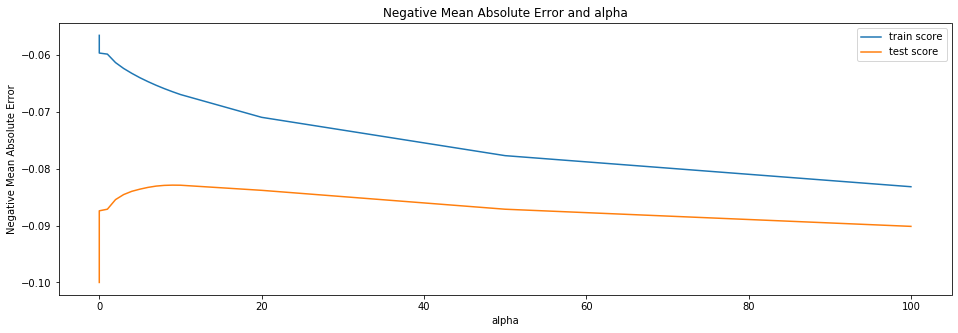

In [433]:

RidgeCVResults['param_alpha'] = RidgeCVResults['param_alpha'].astype('int32')
# plotting mean for train and test score with alpha 
RidgeCVResults['param_alpha'] = RidgeCVResults['param_alpha']
plt.figure(figsize=(16,5))
plt.plot(RidgeCVResults['param_alpha'], RidgeCVResults['mean_train_score'])
plt.plot(RidgeCVResults['param_alpha'], RidgeCVResults['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [434]:
RidgeModelCV.best_estimator_

Ridge(alpha=9.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [435]:
print(int(RidgeModelCV.best_params_.get('alpha')))

9


In [436]:
alpha = int(RidgeModelCV.best_params_.get('alpha'))
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-8.48303835e-03,  1.31370455e-02,  1.97764685e-02,  4.06197280e-03,
        3.68039284e-02,  9.44861030e-03,  1.41379156e-03,  4.47405998e-02,
        3.61173584e-02,  5.05252952e-02,  8.22633014e-02,  3.34349907e-02,
        6.32799166e-03, -4.56814817e-04,  2.21047518e-03, -5.58919623e-02,
       -2.35844266e-02,  5.61835149e-03,  3.31298594e-03,  5.56122275e-02,
        5.27652986e-02,  4.68354490e-02,  2.94307269e-02,  6.88384705e-03,
       -2.06745951e-03, -6.19651115e-03,  1.16688581e-02, -3.54741681e-02,
       -1.50076309e-02,  1.84930299e-02, -2.49139189e-02, -1.44601533e-03,
       -1.24135740e-02, -3.92623556e-03,  1.21601567e-02,  0.00000000e+00,
       -1.91538732e-02,  2.18764270e-02,  3.27824468e-02, -1.08794928e-02,
        1.08598939e-01, -3.67407390e-02, -1.68673972e-02, -6.52907340e-02,
       -6.06132431e-02, -3.33765251e-02, -8.45949569e-03,  1.91108227e-02,
       -1.61113116e-02,  4.73687449e-04,  2.66770987e-02, -5.06733948e-02,
       -8.35049435e-03,  

In [437]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9362080474015231


In [438]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9237117211924072


In [439]:
# RMSE
metrics.mean_squared_error(y_test, ridge.predict(X_test))

0.012831685330116334

### Change in the model if we choose double the value of aplha

In [440]:
alpha = int(RidgeModelCV.best_params_.get('alpha'))*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_


array([-9.21309246e-03,  1.27619307e-02,  1.93574323e-02,  5.55283071e-03,
        3.76358734e-02,  8.57858781e-03,  1.08624424e-03,  4.48851539e-02,
        4.16369197e-02,  5.19836747e-02,  7.99388996e-02,  3.62794210e-02,
        6.74673423e-03, -7.02381686e-05,  2.16284166e-03, -5.44364802e-02,
       -2.69223547e-02,  7.85770326e-03,  3.97690390e-03,  3.77691935e-02,
        2.72039189e-02,  3.47418480e-02,  8.44821422e-03,  5.52031119e-03,
       -3.50174551e-03, -7.83489000e-03,  1.46440334e-02, -2.57360977e-02,
       -1.43036213e-02,  1.75328201e-02, -1.70652283e-02, -3.03594695e-04,
       -1.00388307e-02, -5.13150794e-03,  7.15315889e-03,  0.00000000e+00,
       -1.12950501e-02,  2.32292898e-02,  2.25644616e-02, -8.57851258e-03,
        8.87744410e-02, -3.09368133e-02, -1.48432753e-02, -5.01859719e-02,
       -4.30996975e-02, -2.79318619e-02, -6.29970388e-03,  1.28160321e-02,
       -1.20582822e-02, -3.87025435e-03,  2.51234178e-02, -3.90506342e-02,
       -5.81333592e-03,  

In [441]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9294426413243642


In [442]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9223391297586789


In [443]:
# RMSE
metrics.mean_squared_error(y_test, ridge.predict(X_test))

0.013062555152318448

In [444]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0092
1,LotFrontage,0.0128
2,LotArea,0.0194
3,MasVnrArea,0.0056
4,BsmtFinSF1,0.0376
...,...,...
270,SaleCondition_AdjLand,0.0174
271,SaleCondition_Alloca,0.0207
272,SaleCondition_Family,-0.0035
273,SaleCondition_Normal,0.0612


In [445]:
# convert in dict for other usages
ridge_coeff = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))

In [446]:
# minimise the feature using RFE
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [447]:
ridge_df1 = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
ridge_df1 = ridge_df1.loc[ridge_df1['rfe_support'] == True]
ridge_df1.reset_index(drop=True, inplace=True)

ridge_df1['Coefficient'] = ridge_df1['Features'].apply(lambda x: ridge_coeff[x])
ridge_df1 = ridge_df1.sort_values(by=['Coefficient'], ascending=False)
ridge_df1 = ridge_df1.head(10)
ridge_df1

,Features,rfe_support,rfe_ranking,Coefficient
6,OverallQual_9,True,1,0.0672
5,OverallQual_8,True,1,0.0563
0,MSZoning_FV,True,1,0.0378
2,MSZoning_RL,True,1,0.0347
1,MSZoning_RH,True,1,0.0272
7,OverallQual_10,True,1,0.0255
12,Electrical_FuseP,True,1,0.0086
3,MSZoning_RM,True,1,0.0084
11,Heating_OthW,True,1,0.0048
14,GarageQual_TA,True,1,0.0014


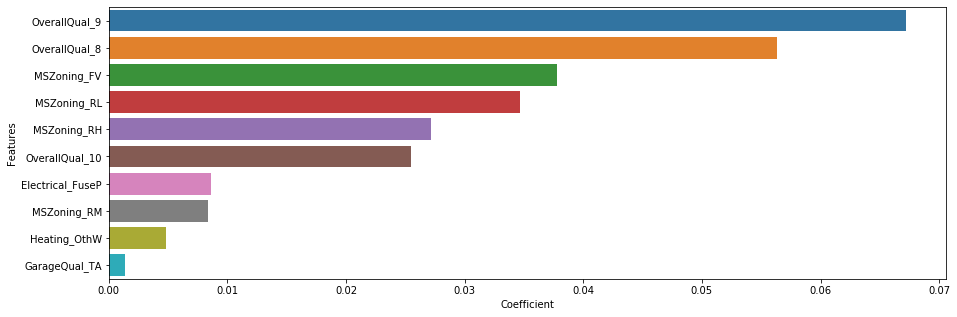

In [448]:
plt.figure(figsize=(15,5))
sns.barplot(y = 'Features', x='Coefficient', data = ridge_df1)
plt.show()

### Lasso

In [449]:
lasso = Lasso()

# list of alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
LassoModelCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)             

LassoModelCV.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [450]:
#checking the value of optimum number of parameters
print(LassoModelCV.best_params_)
print(LassoModelCV.best_score_)

{'alpha': 0.0004}
-0.08416228222105762


In [451]:
# display the mean scores

LassoModelCVResults = pd.DataFrame(LassoModelCV.cv_results_)
LassoModelCVResults[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.0004,-0.066042,-0.084162,1
2,0.0003,-0.064243,-0.084397,2
4,0.0005,-0.067665,-0.084406,3
1,0.0002,-0.061973,-0.084573,4
5,0.001,-0.073802,-0.086282,5
0,0.0001,-0.059542,-0.087109,6
6,0.002,-0.082311,-0.090292,7
7,0.003,-0.088461,-0.094260,8
8,0.004,-0.093322,-0.098057,9
9,0.005,-0.096724,-0.100787,10


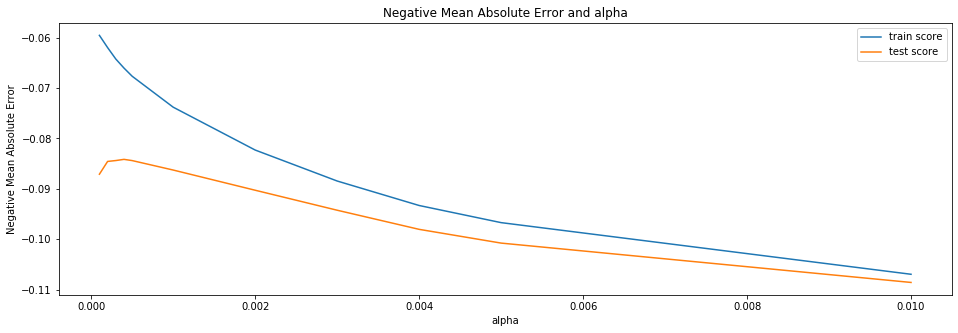

In [452]:
LassoModelCVResults['param_alpha'] = LassoModelCVResults['param_alpha'].astype('float32')

# plotting mean for train and test score with alpha 

plt.figure(figsize=(16,5))
plt.plot(LassoModelCVResults['param_alpha'], LassoModelCVResults['mean_train_score'])
plt.plot(LassoModelCVResults['param_alpha'], LassoModelCVResults['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [453]:
LassoModelCV.best_params_.get('alpha')

0.0004

In [454]:
alpha = LassoModelCV.best_params_.get('alpha')
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
lasso.coef_

array([-5.28238795e-03,  1.35846380e-02,  1.80158697e-02,  3.25912516e-03,
        3.55216705e-02,  8.93247469e-03, -0.00000000e+00,  4.70842935e-02,
        7.34262918e-03,  1.64116314e-02,  1.19651991e-01,  3.57800711e-02,
        6.02851783e-03, -8.49185747e-04,  2.58006492e-03, -6.63393943e-02,
       -1.99815634e-02,  6.59080811e-03,  2.99104146e-03,  5.69182692e-02,
        5.23845699e-02,  3.45810220e-02,  1.87501507e-02,  0.00000000e+00,
        0.00000000e+00, -2.63847358e-03,  0.00000000e+00, -2.14768900e-02,
       -8.09675019e-03,  1.98014432e-02, -8.65261501e-03,  0.00000000e+00,
       -9.44098352e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  3.12270675e-02,  3.57659281e-02, -0.00000000e+00,
        1.44289275e-01, -1.89537395e-02, -0.00000000e+00, -6.96542606e-02,
       -8.02261921e-02, -2.65754878e-02, -0.00000000e+00,  0.00000000e+00,
       -1.85886333e-03,  0.00000000e+00,  2.89143849e-02, -4.10619773e-02,
       -0.00000000e+00,  

In [455]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9355367045198499


In [456]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9236453321726362


In [457]:
# RMSE
metrics.mean_squared_error(y_test, lasso.predict(X_test))

0.012842851960487225

### Change in the model if we choose double the value of aplha

In [458]:
alpha = LassoModelCV.best_params_.get('alpha')*2
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
lasso.coef_

array([-6.45214142e-03,  1.24788880e-02,  1.75273738e-02,  2.78331446e-03,
        3.86582118e-02,  7.05753960e-03, -0.00000000e+00,  4.63029200e-02,
        0.00000000e+00,  0.00000000e+00,  1.38070119e-01,  4.05115548e-02,
        6.55322176e-03, -0.00000000e+00,  3.27948293e-03, -7.06292136e-02,
       -2.22781322e-02,  1.00426172e-02,  3.74409243e-03,  2.66702770e-02,
        0.00000000e+00,  1.80448608e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -3.73400364e-03,  0.00000000e+00, -0.00000000e+00,
       -2.90498856e-03,  1.25385598e-02, -0.00000000e+00,  0.00000000e+00,
       -6.23205508e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  3.26860656e-02,  6.23036681e-03, -0.00000000e+00,
        1.32577332e-01, -1.89429160e-03, -0.00000000e+00, -5.11883995e-02,
       -5.02010827e-02, -1.79777490e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  2.25865877e-02, -2.99165797e-02,
        0.00000000e+00,  

In [459]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9245292633683727


In [460]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9219552036967784


In [461]:
metrics.mean_squared_error(y_test, lasso.predict(X_test))

0.013127131500000416

In [462]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0065
1,LotFrontage,0.0125
2,LotArea,0.0175
3,MasVnrArea,0.0028
4,BsmtFinSF1,0.0387
...,...,...
270,SaleCondition_AdjLand,0.0000
271,SaleCondition_Alloca,0.0000
272,SaleCondition_Family,-0.0000
273,SaleCondition_Normal,0.0653


In [463]:
lasso_coeff = dict(pd.Series(lasso.coef_.round(4), index = X_train.columns))


In [464]:
# minimise the feature using RFE
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [465]:
lasso_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
lasso_df = lasso_df.loc[lasso_df['rfe_support'] == True]
lasso_df.reset_index(drop=True, inplace=True)

lasso_df['Coefficient'] = lasso_df['Features'].apply(lambda x: lasso_coeff[x])
lasso_df = lasso_df.sort_values(by=['Coefficient'], ascending=False)
lasso_df = lasso_df.head(10)
lasso_df

,Features,rfe_support,rfe_ranking,Coefficient
6,OverallQual_9,True,1,0.1432
5,OverallQual_8,True,1,0.0761
7,OverallQual_10,True,1,0.0743
0,MSZoning_FV,True,1,0.0267
2,MSZoning_RL,True,1,0.0180
1,MSZoning_RH,True,1,0.0000
3,MSZoning_RM,True,1,-0.0000
4,OverallQual_2,True,1,-0.0000
9,Exterior1st_BrkComm,True,1,-0.0000
11,Heating_OthW,True,1,0.0000


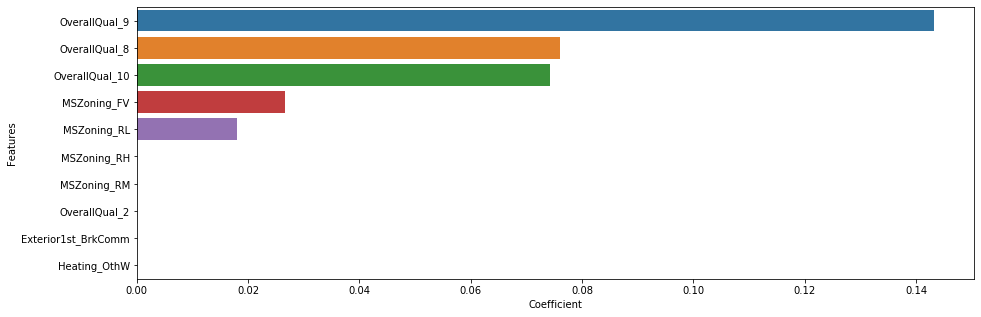

In [466]:
plt.figure(figsize=(15,5))
sns.barplot(y = 'Features', x='Coefficient', data = lasso_df)
plt.show()

#### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [467]:
# After excluding the top 5 feature
top5=['OverallQual_9', 'OverallQual_8', 'OverallQual_10', 'MSZoning_FV', 'MSZoning_RL']
    
X_train=X_train.drop(columns=top5)
X_test=X_test.drop(columns=top5)


In [468]:
LassoModelCV.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [469]:
print(LassoModelCV.best_params_)
print(LassoModelCV.best_score_)

{'alpha': 0.0004}
-0.08406006017464109


In [470]:
# display the mean scores

LassoModelCVResults = pd.DataFrame(LassoModelCV.cv_results_)
LassoModelCVResults[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.0004,-0.066739,-0.084060,1
4,0.0005,-0.068340,-0.084399,2
2,0.0003,-0.065088,-0.084563,3
1,0.0002,-0.063325,-0.085480,4
5,0.001,-0.075058,-0.087088,5
0,0.0001,-0.061413,-0.087702,6
6,0.002,-0.084043,-0.092227,7
7,0.003,-0.089759,-0.095723,8
8,0.004,-0.093916,-0.098609,9
9,0.005,-0.097018,-0.101007,10


In [471]:
alpha = LassoModelCV.best_params_.get('alpha')
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.00636352,  0.01365334,  0.0183417 ,  0.00392089,  0.03538404,
        0.00820143, -0.        ,  0.04796514,  0.01263489,  0.02134234,
        0.11536183,  0.03629441,  0.00657018, -0.00049823,  0.00188087,
       -0.06601247, -0.02079924,  0.00528396,  0.00266252,  0.01805514,
        0.        ,  0.        ,  0.        , -0.00393826,  0.        ,
       -0.03008359, -0.01089074,  0.0190684 , -0.00985947, -0.        ,
       -0.00987322, -0.        ,  0.        ,  0.        , -0.0085104 ,
        0.02175114,  0.03309638, -0.        ,  0.14292132, -0.02188105,
       -0.        , -0.0893308 , -0.09112905, -0.03049012, -0.        ,
        0.        , -0.00365896,  0.        ,  0.04300447, -0.05458952,
       -0.        ,  0.        , -0.        ,  0.04491766,  0.11097193,
       -0.        ,  0.00326921, -0.        ,  0.04113291, -0.        ,
        0.03105012, -0.02525689,  0.03628313, -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.  

In [472]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0064
1,LotFrontage,0.0137
2,LotArea,0.0183
3,MasVnrArea,0.0039
4,BsmtFinSF1,0.0354
...,...,...
265,SaleCondition_AdjLand,0.0000
266,SaleCondition_Alloca,0.0214
267,SaleCondition_Family,-0.0000
268,SaleCondition_Normal,0.0740


In [473]:
lasso_coeff = dict(pd.Series(lasso.coef_.round(4), index = X_train.columns))


In [474]:
lasso_df.head()

,Features,Coefficient
0,MSSubClass,-0.0064
1,LotFrontage,0.0137
2,LotArea,0.0183
3,MasVnrArea,0.0039
4,BsmtFinSF1,0.0354


In [475]:
# minimise the feature using RFE
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [476]:
lasso_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
lasso_df = lasso_df.loc[lasso_df['rfe_support'] == True]
lasso_df.reset_index(drop=True, inplace=True)

lasso_df['Coefficient'] = lasso_df['Features'].apply(lambda x: lasso_coeff[x])
lasso_df = lasso_df.sort_values(by=['Coefficient'], ascending=False)
lasso_df = lasso_df.head(10)
lasso_df

,Features,rfe_support,rfe_ranking,Coefficient
10,TotRmsAbvGrd_8,True,1,0.0190
9,TotRmsAbvGrd_7,True,1,0.0087
8,TotRmsAbvGrd_6,True,1,0.0052
2,RoofMatl_Metal,True,1,0.0000
3,ExterQual_Fa,True,1,-0.0000
5,TotRmsAbvGrd_3,True,1,0.0000
6,TotRmsAbvGrd_4,True,1,-0.0000
11,TotRmsAbvGrd_9,True,1,-0.0000
12,TotRmsAbvGrd_10,True,1,0.0000
14,TotRmsAbvGrd_12,True,1,0.0000


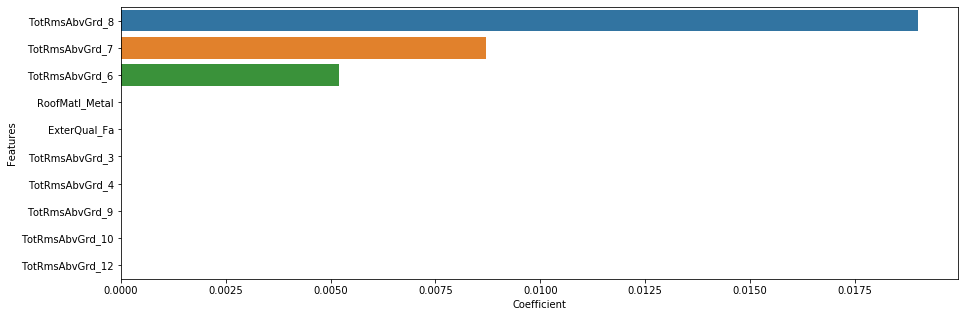

In [477]:
plt.figure(figsize=(15,5))
sns.barplot(y = 'Features', x='Coefficient', data = lasso_df)
plt.show()